In [217]:
from useful_scit.imps import *
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 100
# mpl.rcParams['figure.figsize']=[4.0, 3.0]
# %config InlineBackend.figure_format = 'retina'

In [206]:
# mpl.rcParams

In [195]:
sys.path.insert(0,'../util/')
import funs
importlib.reload(funs);

In [ ]:
df_bc = funs.get_bc_data('../data/MAAP/')

In [152]:
df_abs = df_bc[['abs670']]

In [7]:
df_co = funs.read_co_data('../data/Chacaltaya_HORIBA_2013_2019_Local-Time.co')

In [8]:
df_co.columns

Index(['CO_ppbv'], dtype='object')

In [153]:
df_join = pd.merge(df_co,df_abs,how='outer',right_index=True,left_index=True)

In [154]:
df_join['both']=False
df_join.loc[
    (df_join['CO_ppbv'].isna()==False) &
    (df_join['abs670' ].isna()==False),
    'both'
] = True
    

In [155]:
df_join.both.describe()

count     62040
unique        2
top        True
freq      39585
Name: both, dtype: object

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(30, 140)

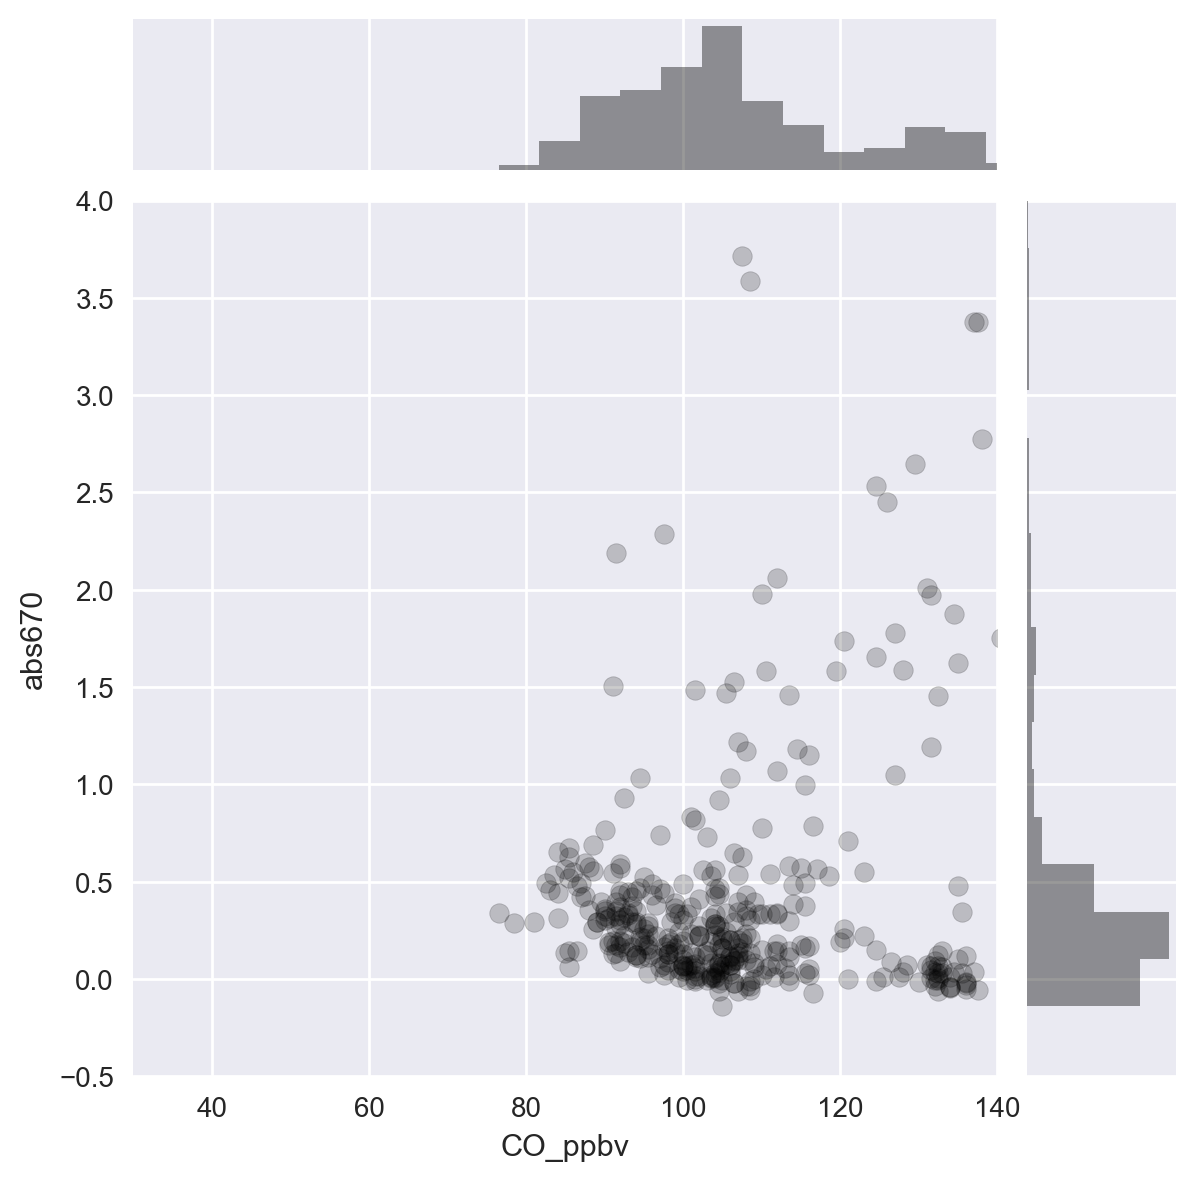

In [218]:
jp=sns.jointplot(
    'CO_ppbv','abs670',
    data=df_join[df_join.both]['2014-01'],
    color=[0,0,0,.2]
)

jp.ax_joint.set_ylim(-.5,4)
# jp.ax_joint.set_yscale('log')
jp.ax_joint.set_xlim(30,140)
# jp.ax_joint.set_xscale('log')
# jp.fig

(0, 200)

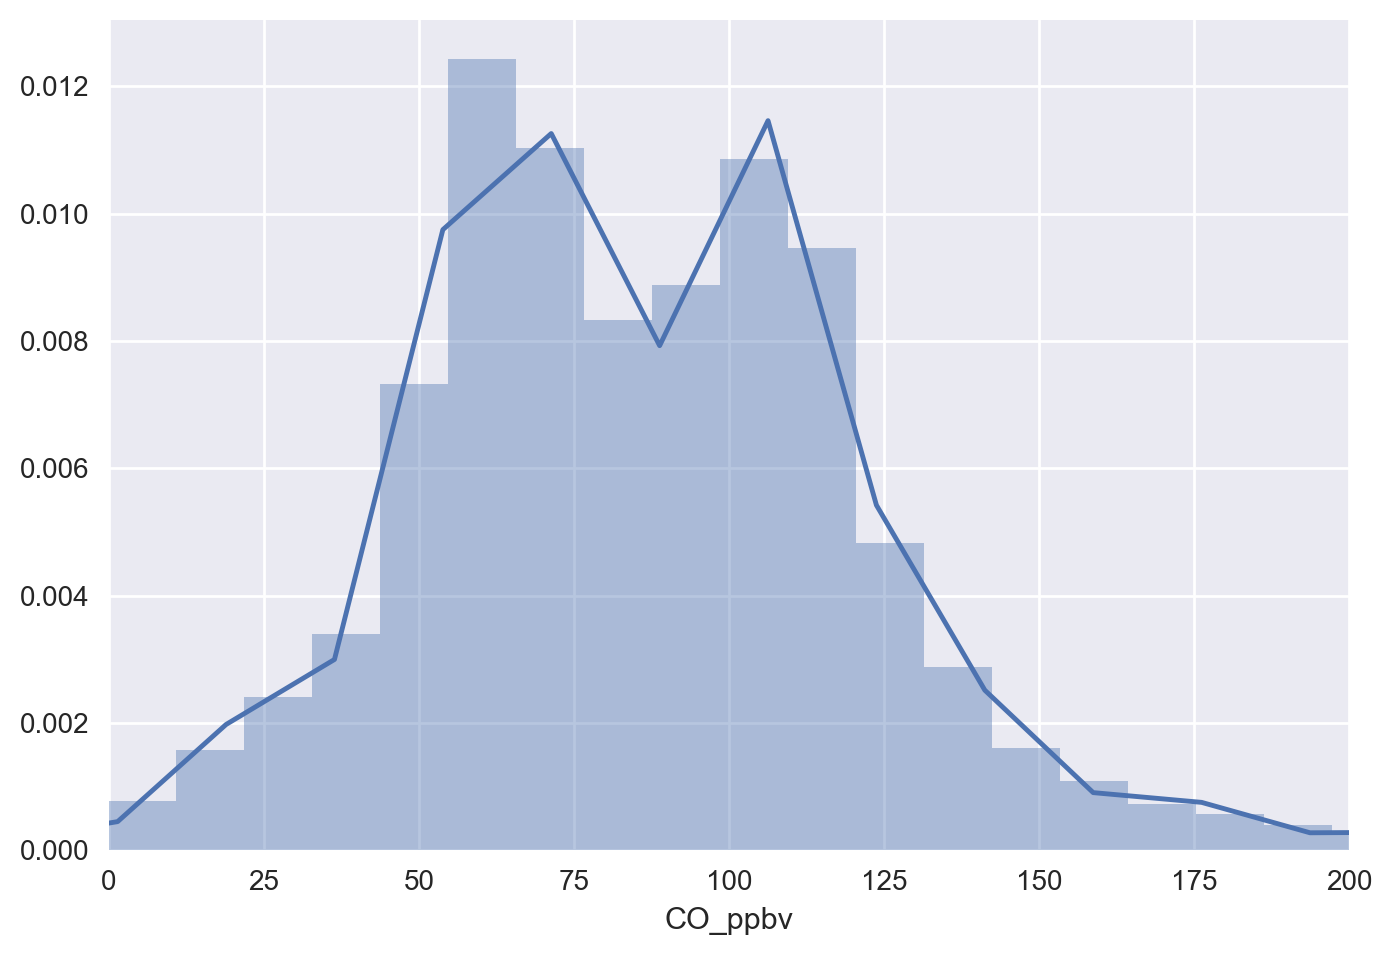

In [219]:
ax=sns.distplot(df_join.CO_ppbv.dropna(),bins=200)
ax.set_xlim(0,200)

(-1, 5)

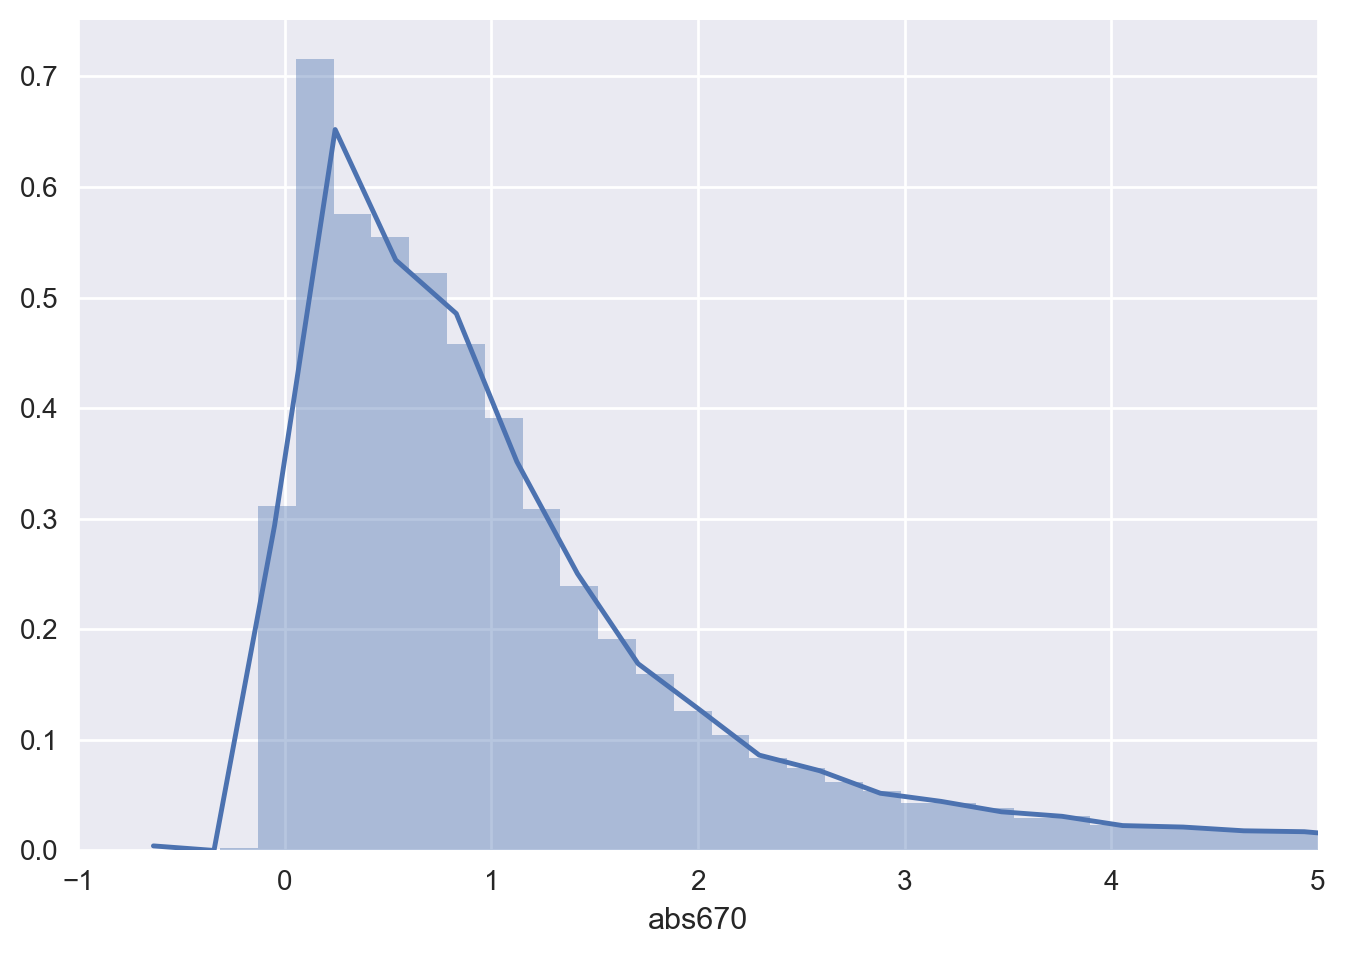

In [220]:
ax=sns.distplot(df_join.abs670.dropna(),bins=200)
ax.set_xlim(-1,5)

In [221]:
timy_things = ['year','month','day','hour']
df_join1 = df_join.copy()
for t in timy_things:
    df_join1[t] = getattr(df_join.index,t)

In [222]:
_d_fake = df_join1.copy()
_d_fake['day']=1
df_join1['y_m']=pd.to_datetime(_d_fake[['year','month','day']])

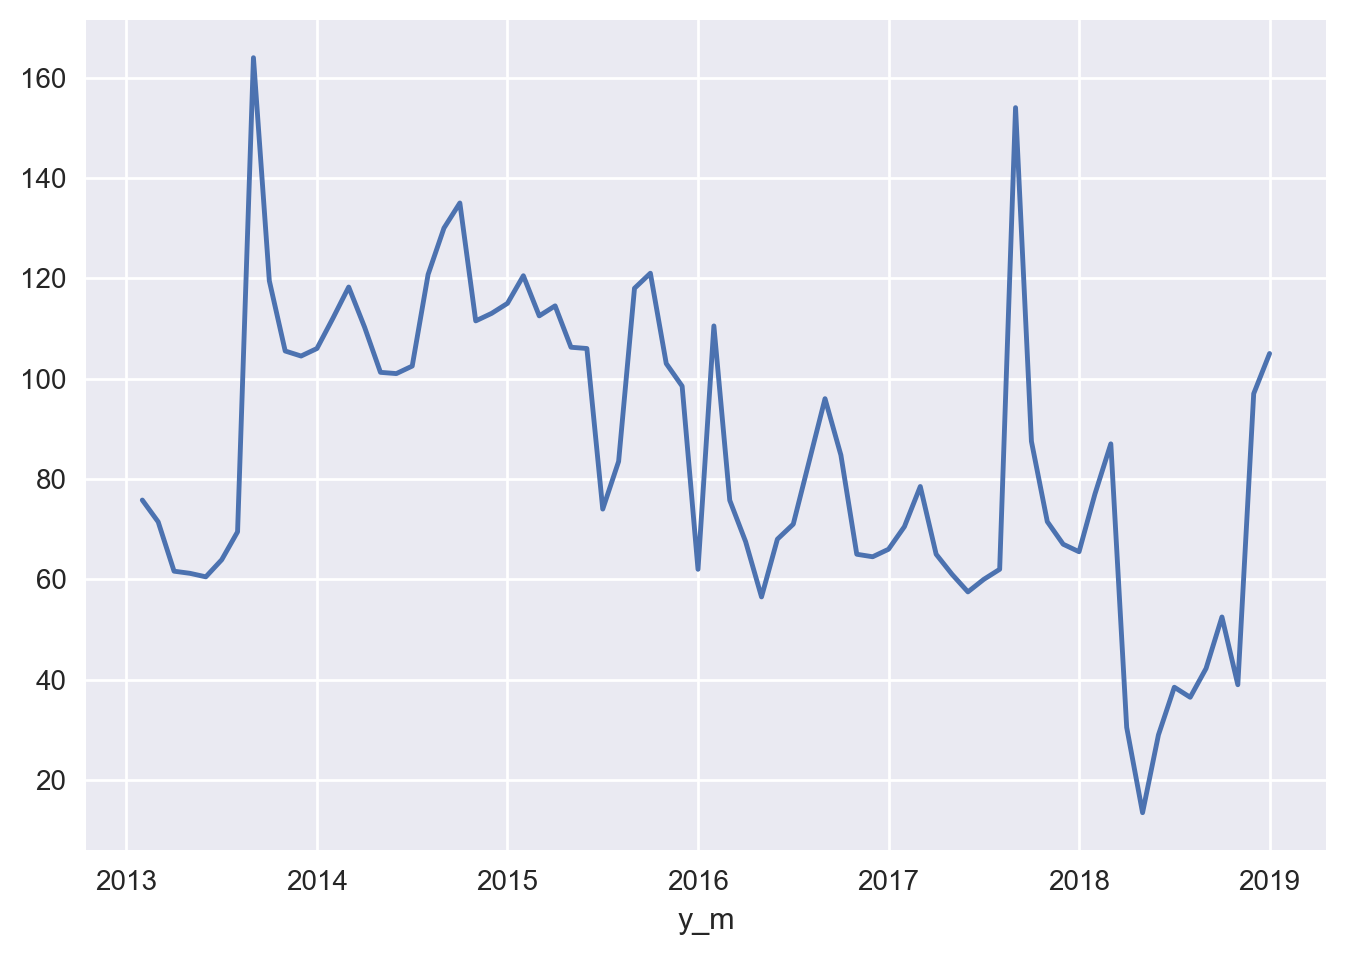

In [223]:
dg = df_join1.groupby('y_m')
dg.CO_ppbv.median().plot()

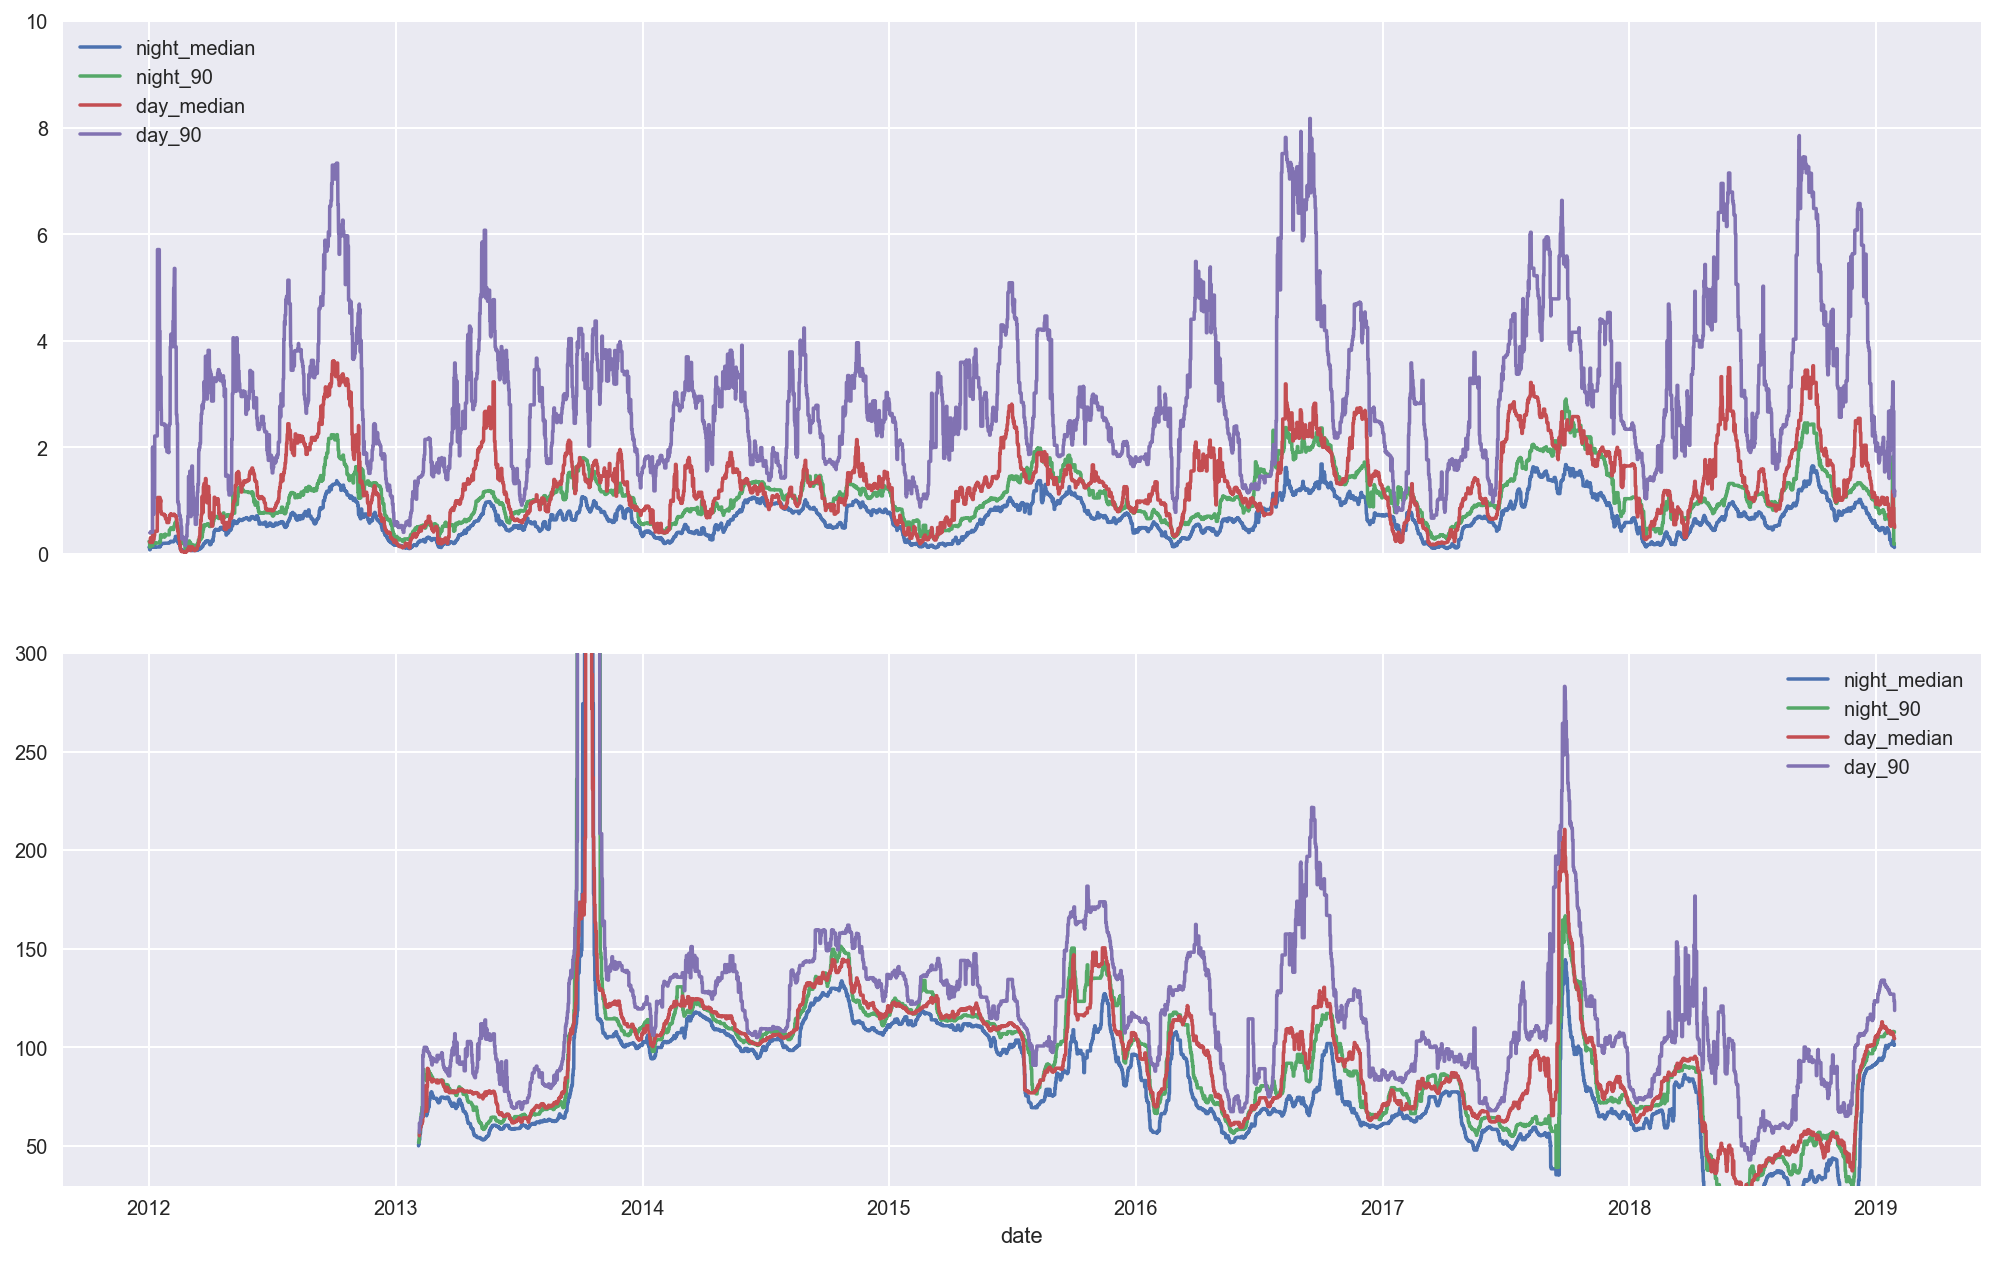

In [224]:
d1,d2 = 5,10
n1,n2 = 15,18
days = 30
par = 'abs670'
def comb_plot(d1,d2,n1,n2,days,par,l1,l2,ax=False):
    if ax==False: 
        fig, ax=plt.subplots()
    ax=df_join1[(df_join1.hour>=d1)&(df_join1.hour<=d2)][par].resample('1H').mean().rolling(24*days,min_periods=5).median  (   ).plot(ax=ax, label='night_median')
    ax=df_join1[(df_join1.hour>=d1)&(df_join1.hour<=d2)][par].resample('1H').mean().rolling(24*days,min_periods=5).quantile(.75).plot(ax=ax, label='night_90    ')
    ax=df_join1[(df_join1.hour>=n1)&(df_join1.hour<=n2)][par].resample('1H').mean().rolling(24*days,min_periods=5).median  (   ).plot(ax=ax, label='day_median  ')
    ax=df_join1[(df_join1.hour>=n1)&(df_join1.hour<=n2)][par].resample('1H').mean().rolling(24*days,min_periods=5).quantile(.75).plot(ax=ax, label='day_90      ') 
    
#     ax.grid(which='major',color=[0,0,0,1]    )
#     ax.grid(which='minor',color=[.8,.8,.8,1] )
    ax.set_ylim(l1,l2)
    return ax
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2,sharex=ax1)
comb_plot(d1,d2,n1,n2,days,par,0,10,ax1)
# plt.subplots()
par = 'CO_ppbv'
comb_plot(d1,d2,n1,n2,days,par,30,300,ax2)
fig.tight_layout()
fig.set_figwidth(15)
fig.set_figheight(10)
ax1.legend()
ax2.legend()


In [225]:
xs_co = funs.open_sat_co('../data/co_sat/')

In [299]:
cla,clo=-16.3472497,-68.1383381

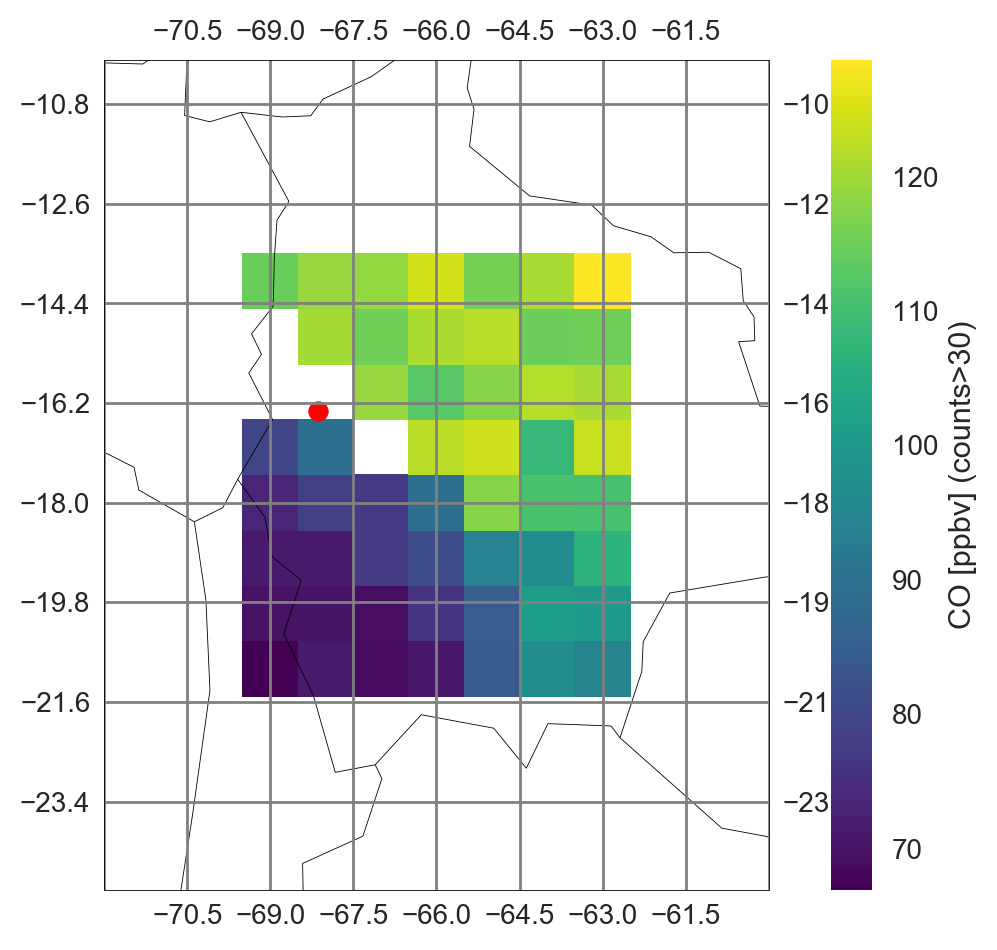

In [305]:
_m = xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.median('time')
_c = xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.count('time')

import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
_name='CO [ppbv] (counts>30)'
_m = _m.where(_c>30)
_m.name = _name
_m.plot(ax=ax)
ax.set_extent([-72, -60, -10, -25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(),color = 'grey',draw_labels=True)
ax.scatter(
    [clo], [cla], 
    color = 'red'
)
# ax.figure.set_size_inches(6,6)

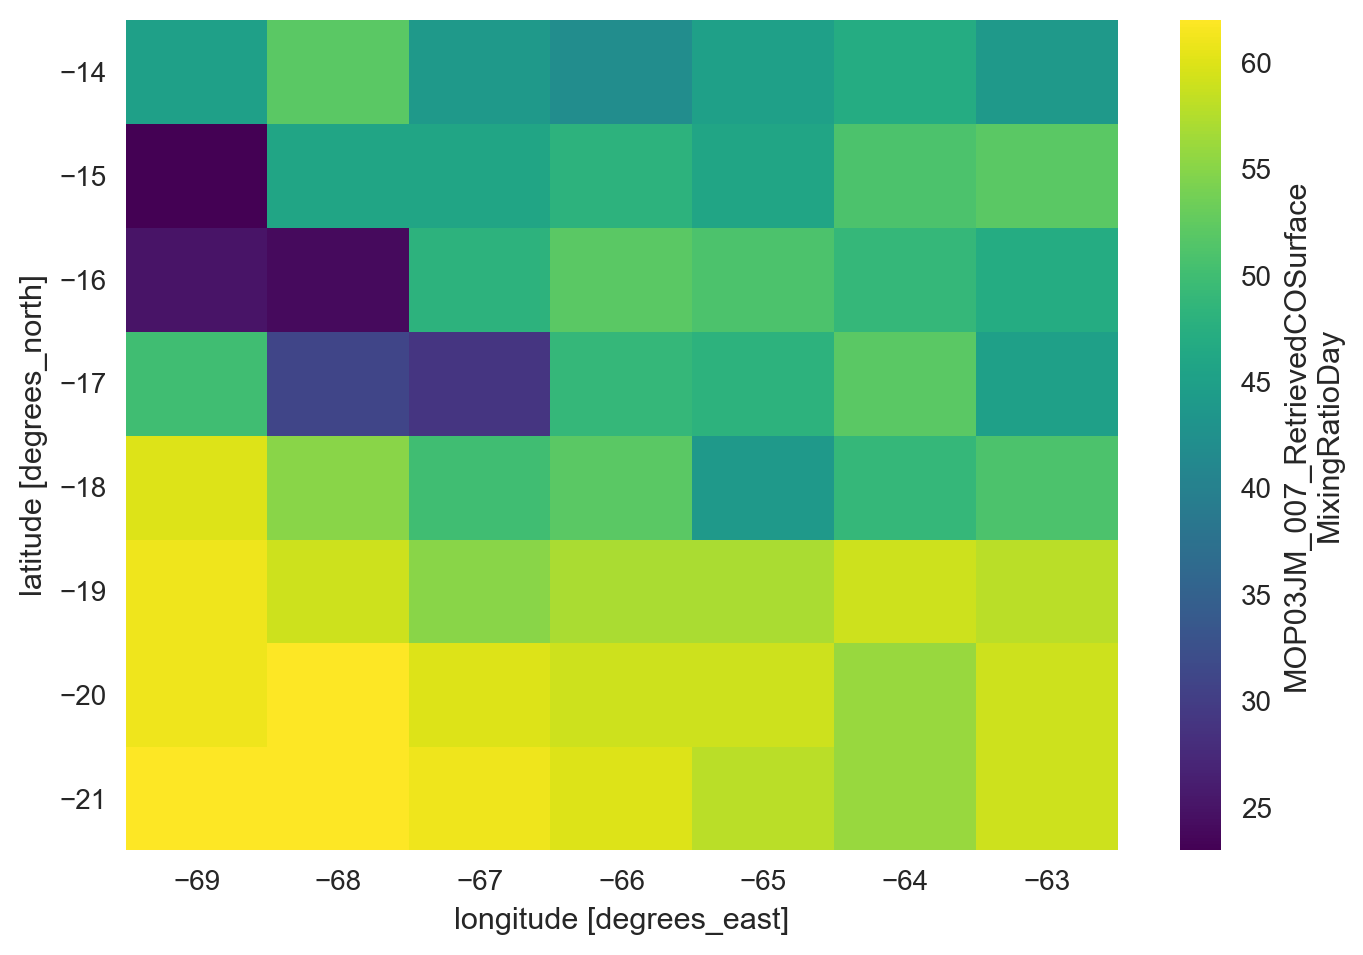

In [308]:
_c.plot()

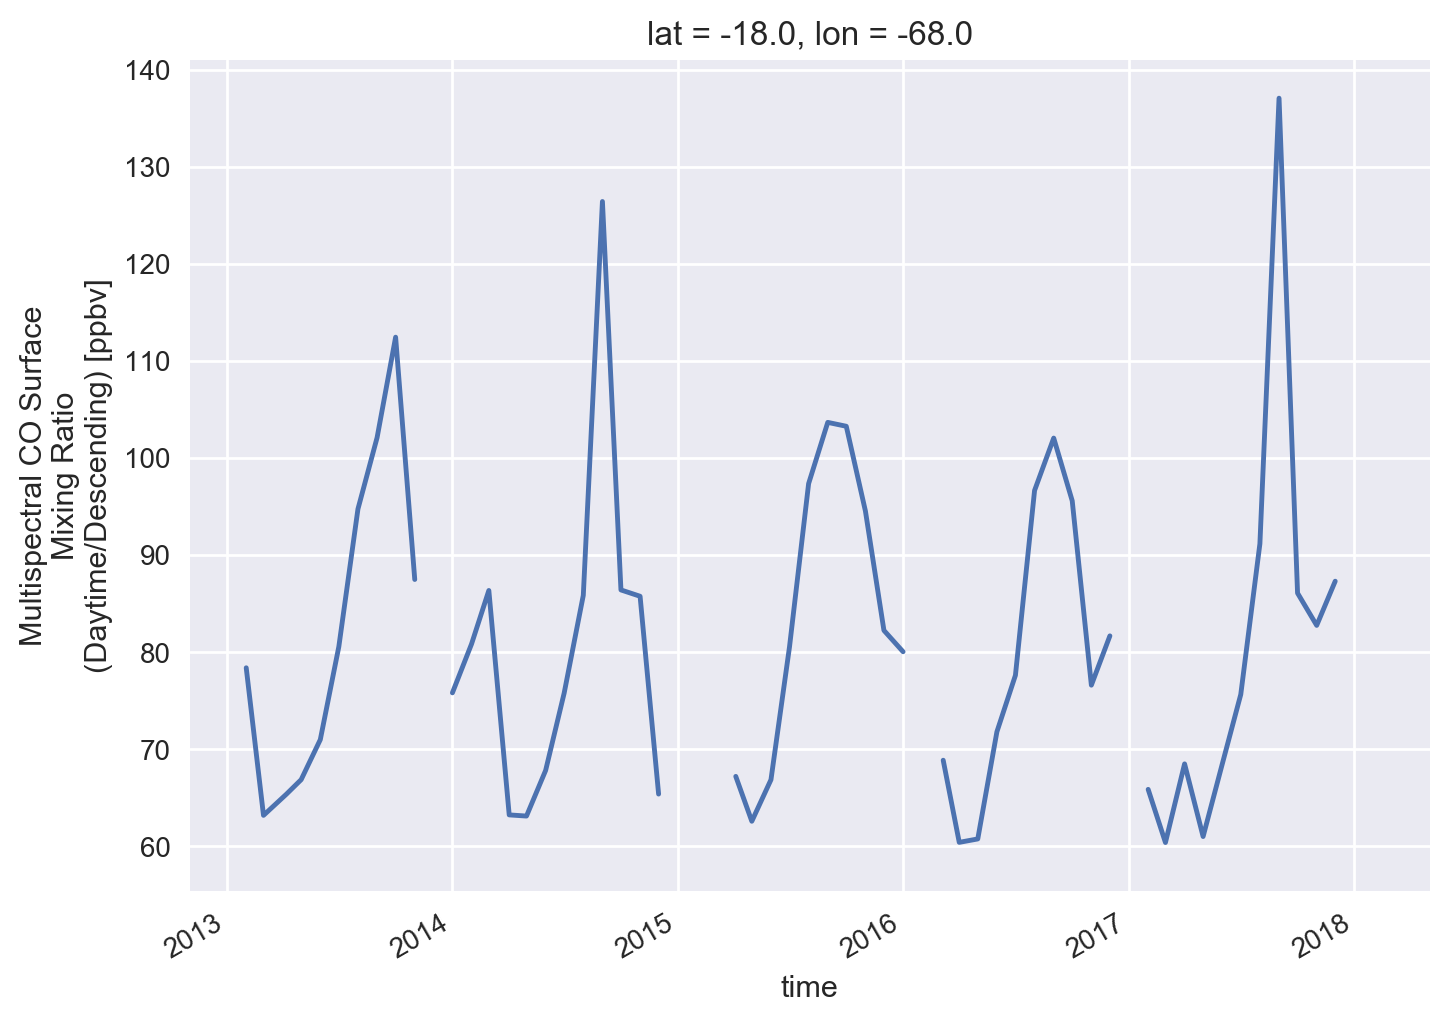

In [311]:
xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.sel(lat=-18.,lon=-68.).plot()

(0, 200)

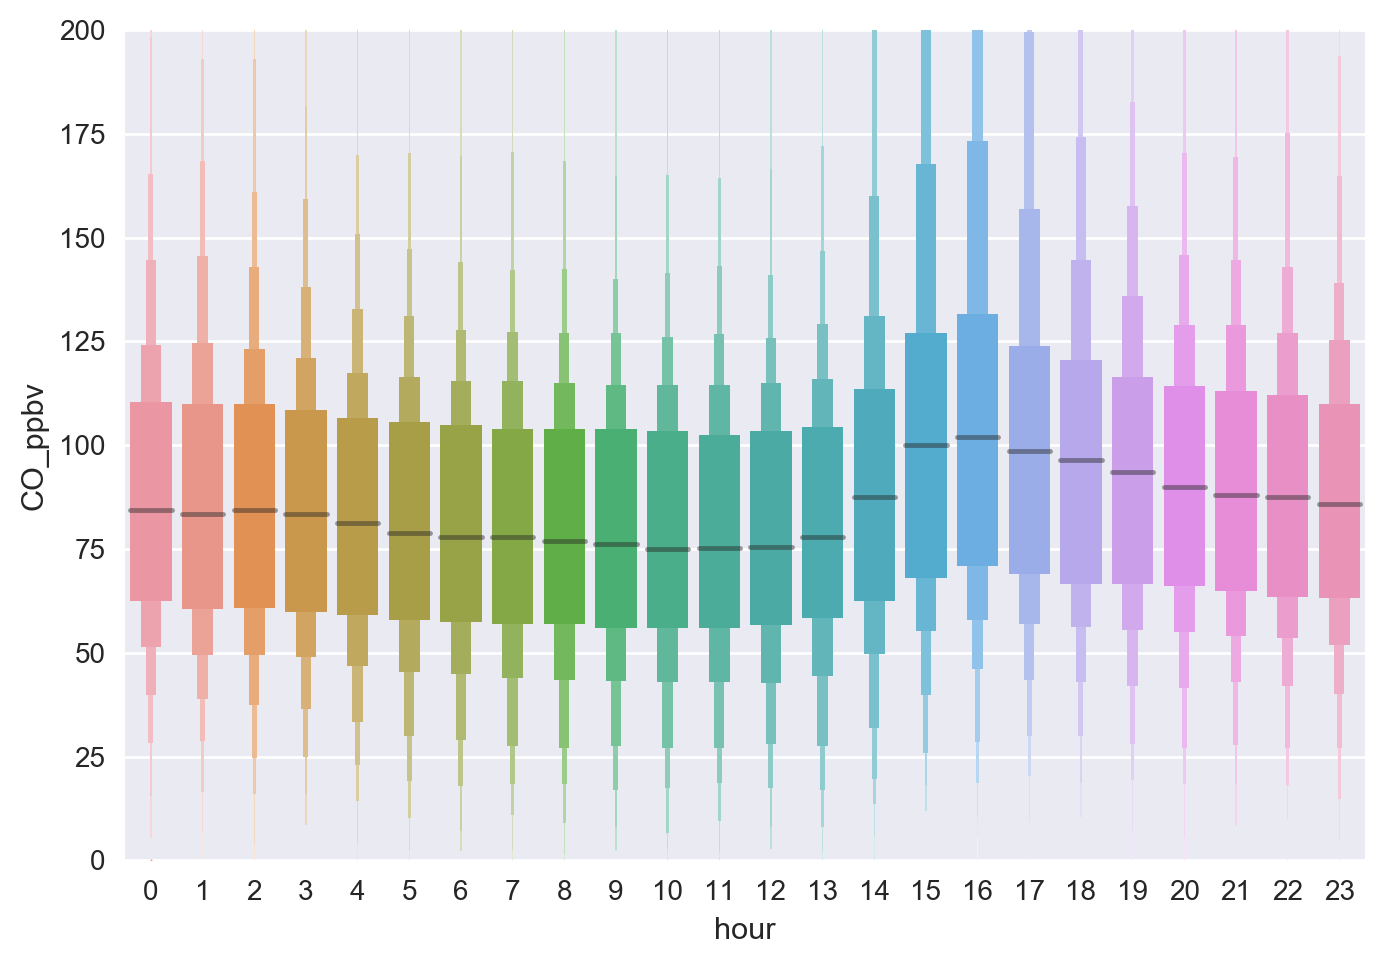

In [242]:
ax = sns.boxenplot(
    x='hour',
    y='CO_ppbv',
    data=df_join1,
    
)
ax.set_ylim(0,200)

In [237]:
df_join1.sample()

CO_ppbv  abs670  both  year  month  day  hour        y_m
date                                                                         
2017-06-04 20:00:00     63.5  0.1606  True  2017      6    4    20 2017-06-01

In [293]:
_x = xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.median(['lat','lon'])
_x = _x.to_dataframe()
_x.index = pd.to_datetime(_x.index.date)
_x.index.name='y_m'

In [275]:
_d = df_join1.groupby('y_m')['CO_ppbv'].median()
# pd.to_datetime(_x.index)

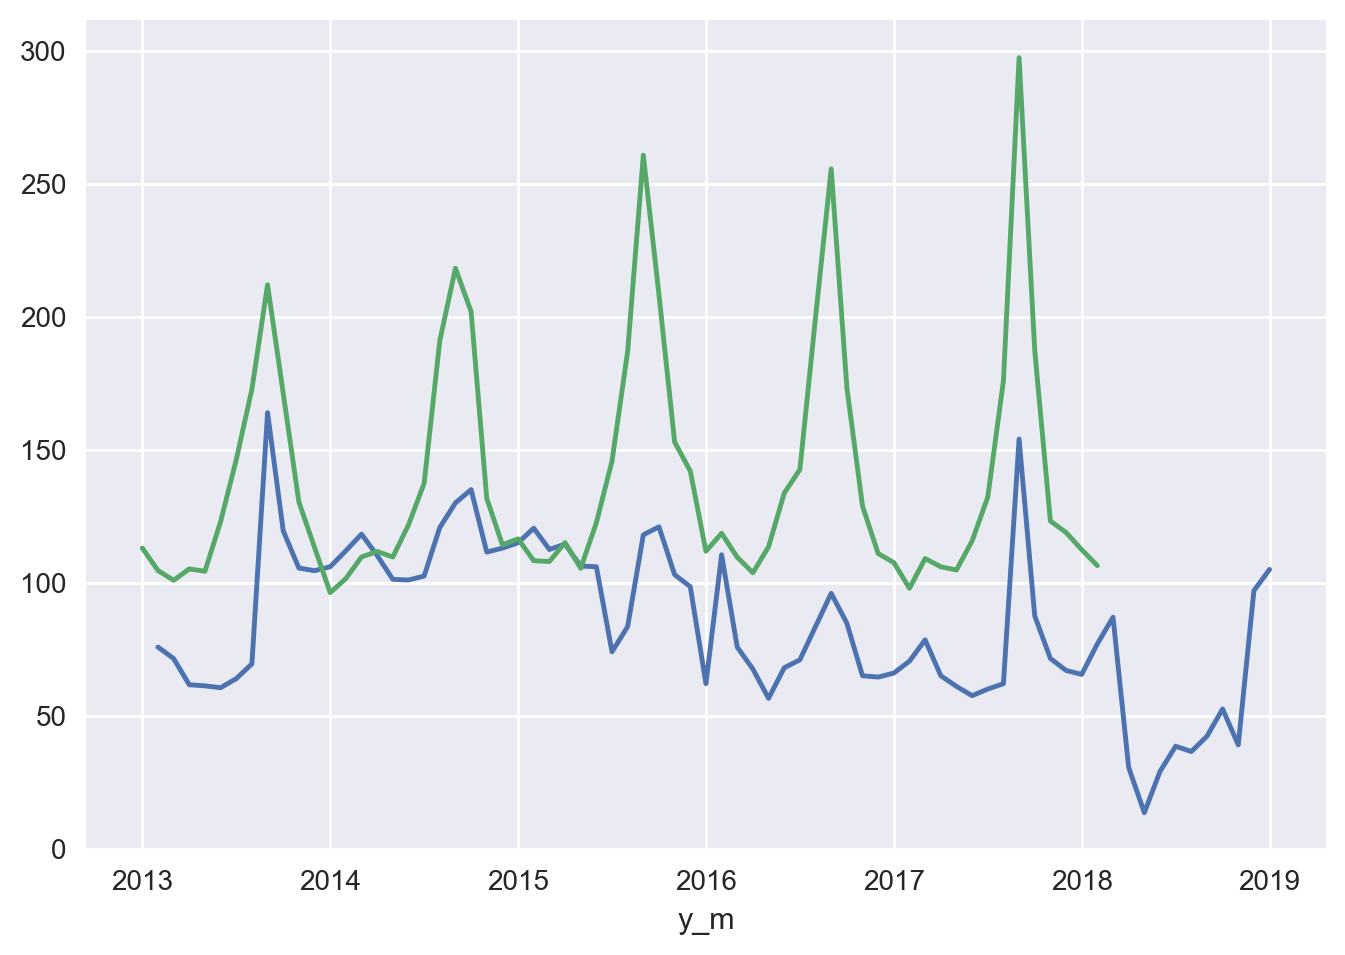

In [298]:
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()
# df_join1.groupby('y_m')['CO_ppbv'].median().plot(ax=ax)
# xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.median(['lat','lon']).plot(ax=ax)
_d.plot(ax=ax,label = 'CO [ppbv] at chc')
(_x+25).MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.plot(ax=ax, label= 'CO[ppbv] from MOPIT')
# xd = _x.join(_d,how='outer')
# xd.plot()

In [284]:
_x.join(_d)

MOP03JM_007_RetrievedCOSurfaceMixingRatioDay  CO_ppbv
y_m                                                              
2013-01-01                                     88.010590      NaN
2013-02-01                                     79.568451   75.800
2013-03-01                                     75.892410   71.450
2013-04-07                                     80.174362      NaN
2013-05-01                                     79.290787   61.200
2013-06-01                                     97.928902   60.500
2013-07-01                                    121.230019   63.900
2013-08-01                                    147.770615   69.475
2013-09-01                                    187.012283  163.950
2013-10-01                                    146.231262  119.500
2013-11-01                                    105.352249  105.500
2013-12-01                                     88.260780  104.500
2014-01-01                                     71.249847  106.000
2014-02-01                                     76.543007  112.000
2014-03-01                                     84.665222  118.250
2014-04-03                                     86.743767      NaN
2014-05-01                                     84.648621  101.250
2014-06-01                                     96.721680  101.000
2014-07-01                                    112.336128  102.500
2014-08-01                                    165.989685  120.750
2014-09-01                                    193.234955  130.000
2014-10-01                                    176.965561  135.000
2014-11-01                                    106.692322  111.500
2014-12-01                                     89.236816  113.000
2015-01-01                                     91.475090  115.000
2015-02-01                                     83.261765  120.500
2015-03-01                                     82.964989  112.500
2015-04-05                                     90.069969      NaN
2015-05-01                                     80.417389  106.250
2015-06-01                                     97.536514  106.000
...                                                  ...      ...
2015-09-01                                    235.770172  118.000
2015-10-01                                    183.227417  121.000
2015-11-01                                    127.891609  103.000
2015-12-01                                    116.964706   98.500
2016-01-01                                     86.815460   62.000
2016-02-01                                     93.590073  110.500
2016-03-06                                     84.558563      NaN
2016-04-01                                     78.733604   67.500
2016-05-01                                     88.511276   56.500
2016-06-01                                    108.681099   68.000
2016-07-01                                    117.562416   71.000
2016-08-01                                    174.830231   83.500
2016-09-01                                    230.604446   96.000
2016-10-01                                    148.439148   84.750
2016-11-01                                    103.800812   65.000
2016-12-01                                     85.954231   64.500
2017-01-01                                     82.578842   66.000
2017-02-01                                     72.868530   70.500
2017-03-01                                     84.084885   78.500
2017-04-01                                     80.963760   65.000
2017-05-01                                     79.769836   61.000
2017-06-01                                     90.709045   57.500
2017-07-01                                    107.177460   60.000
2017-08-01                                    150.848068   62.000
2017-09-01                                    272.430420  154.000
2017-10-01                                    162.397430   87.500
2017-11-01                                     98.167404   71.500
2017-12-01                                     93.90

In [280]:
_x

MOP03JM_007_RetrievedCOSurfaceMixingRatioDay
y_m                                                     
2013-01-01                                     88.010590
2013-02-01                                     79.568451
2013-03-01                                     75.892410
2013-04-07                                     80.174362
2013-05-01                                     79.290787
2013-06-01                                     97.928902
2013-07-01                                    121.230019
2013-08-01                                    147.770615
2013-09-01                                    187.012283
2013-10-01                                    146.231262
2013-11-01                                    105.352249
2013-12-01                                     88.260780
2014-01-01                                     71.249847
2014-02-01                                     76.543007
2014-03-01                                     84.665222
2014-04-03                                     86.743767
2014-05-01                                     84.648621
2014-06-01                                     96.721680
2014-07-01                                    112.336128
2014-08-01                                    165.989685
2014-09-01                                    193.234955
2014-10-01                                    176.965561
2014-11-01                                    106.692322
2014-12-01                                     89.236816
2015-01-01                                     91.475090
2015-02-01                                     83.261765
2015-03-01                                     82.964989
2015-04-05                                     90.069969
2015-05-01                                     80.417389
2015-06-01                                     97.536514
...                                                  ...
2015-09-01                                    235.770172
2015-10-01                                    183.227417
2015-11-01                                    127.891609
2015-12-01                                    116.964706
2016-01-01                                     86.815460
2016-02-01                                     93.590073
2016-03-06                                     84.558563
2016-04-01                                     78.733604
2016-05-01                                     88.511276
2016-06-01                                    108.681099
2016-07-01                                    117.562416
2016-08-01                                    174.830231
2016-09-01                                    230.604446
2016-10-01                                    148.439148
2016-11-01                                    103.800812
2016-12-01                                     85.954231
2017-01-01                                     82.578842
2017-02-01                                     72.868530
2017-03-01                                     84.084885
2017-04-01                                     80.963760
2017-05-01                                     79.769836
2017-06-01                                     90.709045
2017-07-01                                    107.177460
2017-08-01                                    150.848068
2017-09-01                                    272.430420
2017-10-01                                    162.397430
2017-11-01                                     98.167404
2017-12-01                                     93.907394
2018-01-01                                     87.407478
2018-02-01                                     81.403122

[62 rows x 1 columns]

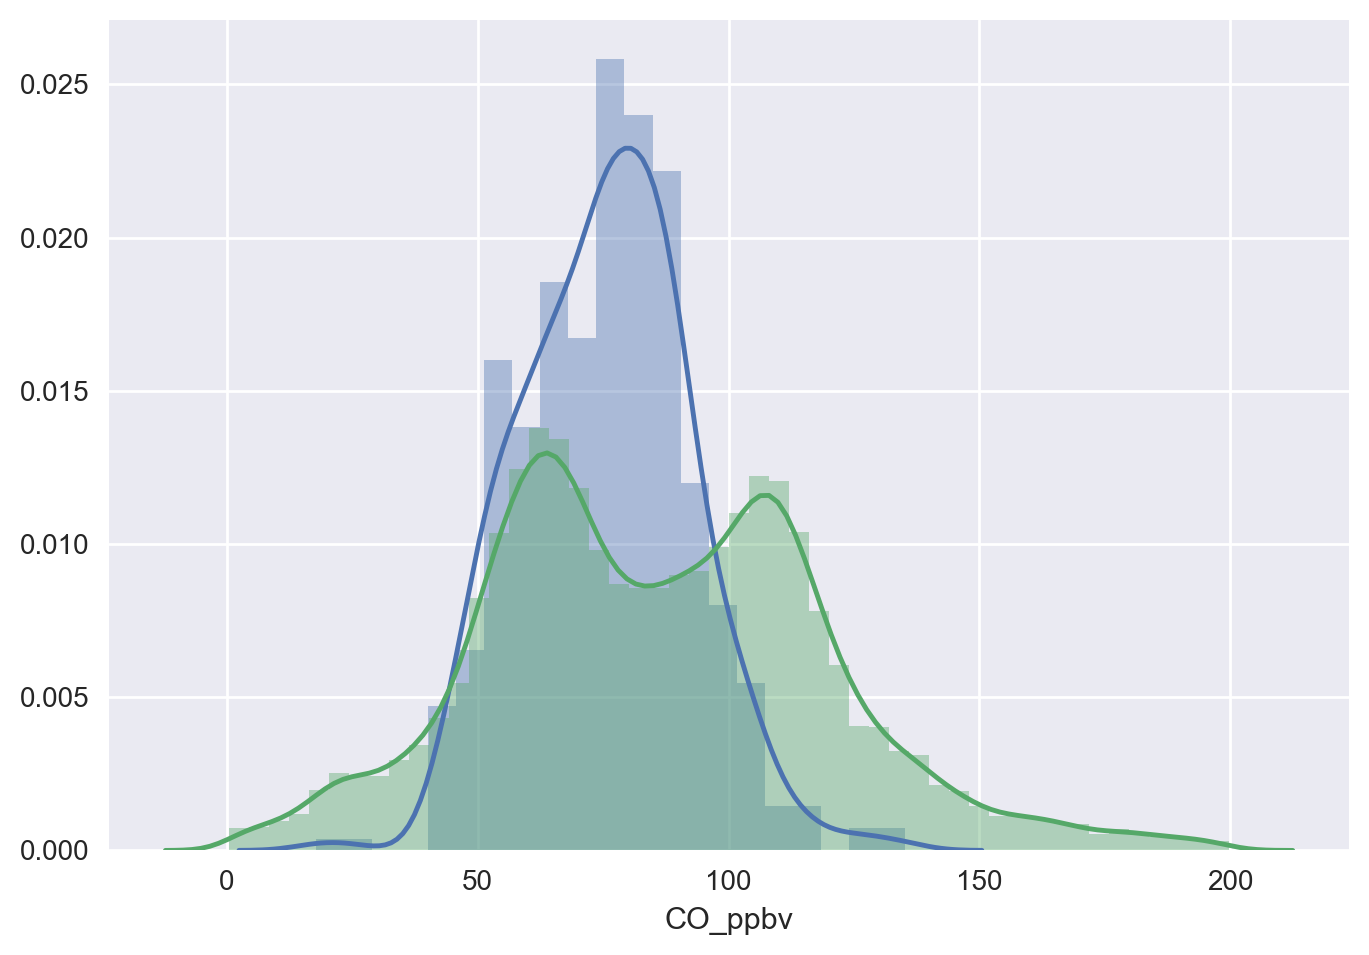

In [365]:
d1 = '2013-03-01'
ddc = ddn = df_join1.CO_ppbv.dropna()
ddc =ddc[(ddc<200) & (ddc>0)]
ddn = ddn[ddn.index<d1]
ddn = ddn[(ddn<200) & (ddn>0)]
fig, ax = plt.subplots()
sns.distplot(ddn,ax=ax)
sns.distplot(ddc,ax=ax)

In [360]:
_ = xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.values
vals = np.ndarray.flatten(_)
vals = vals[np.isnan(vals)==False]

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


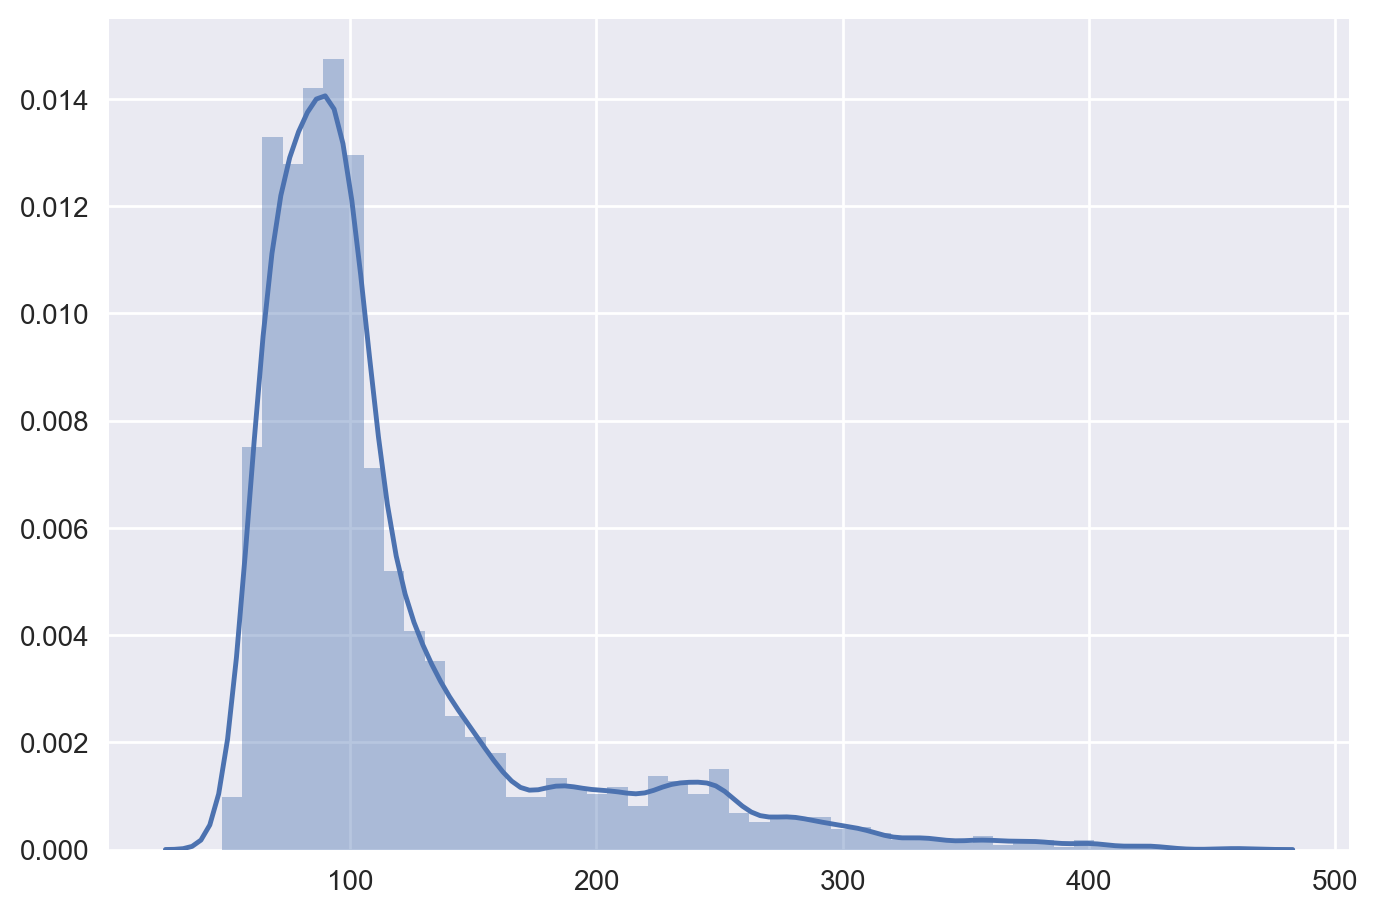

In [361]:
sns.distplot(vals)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


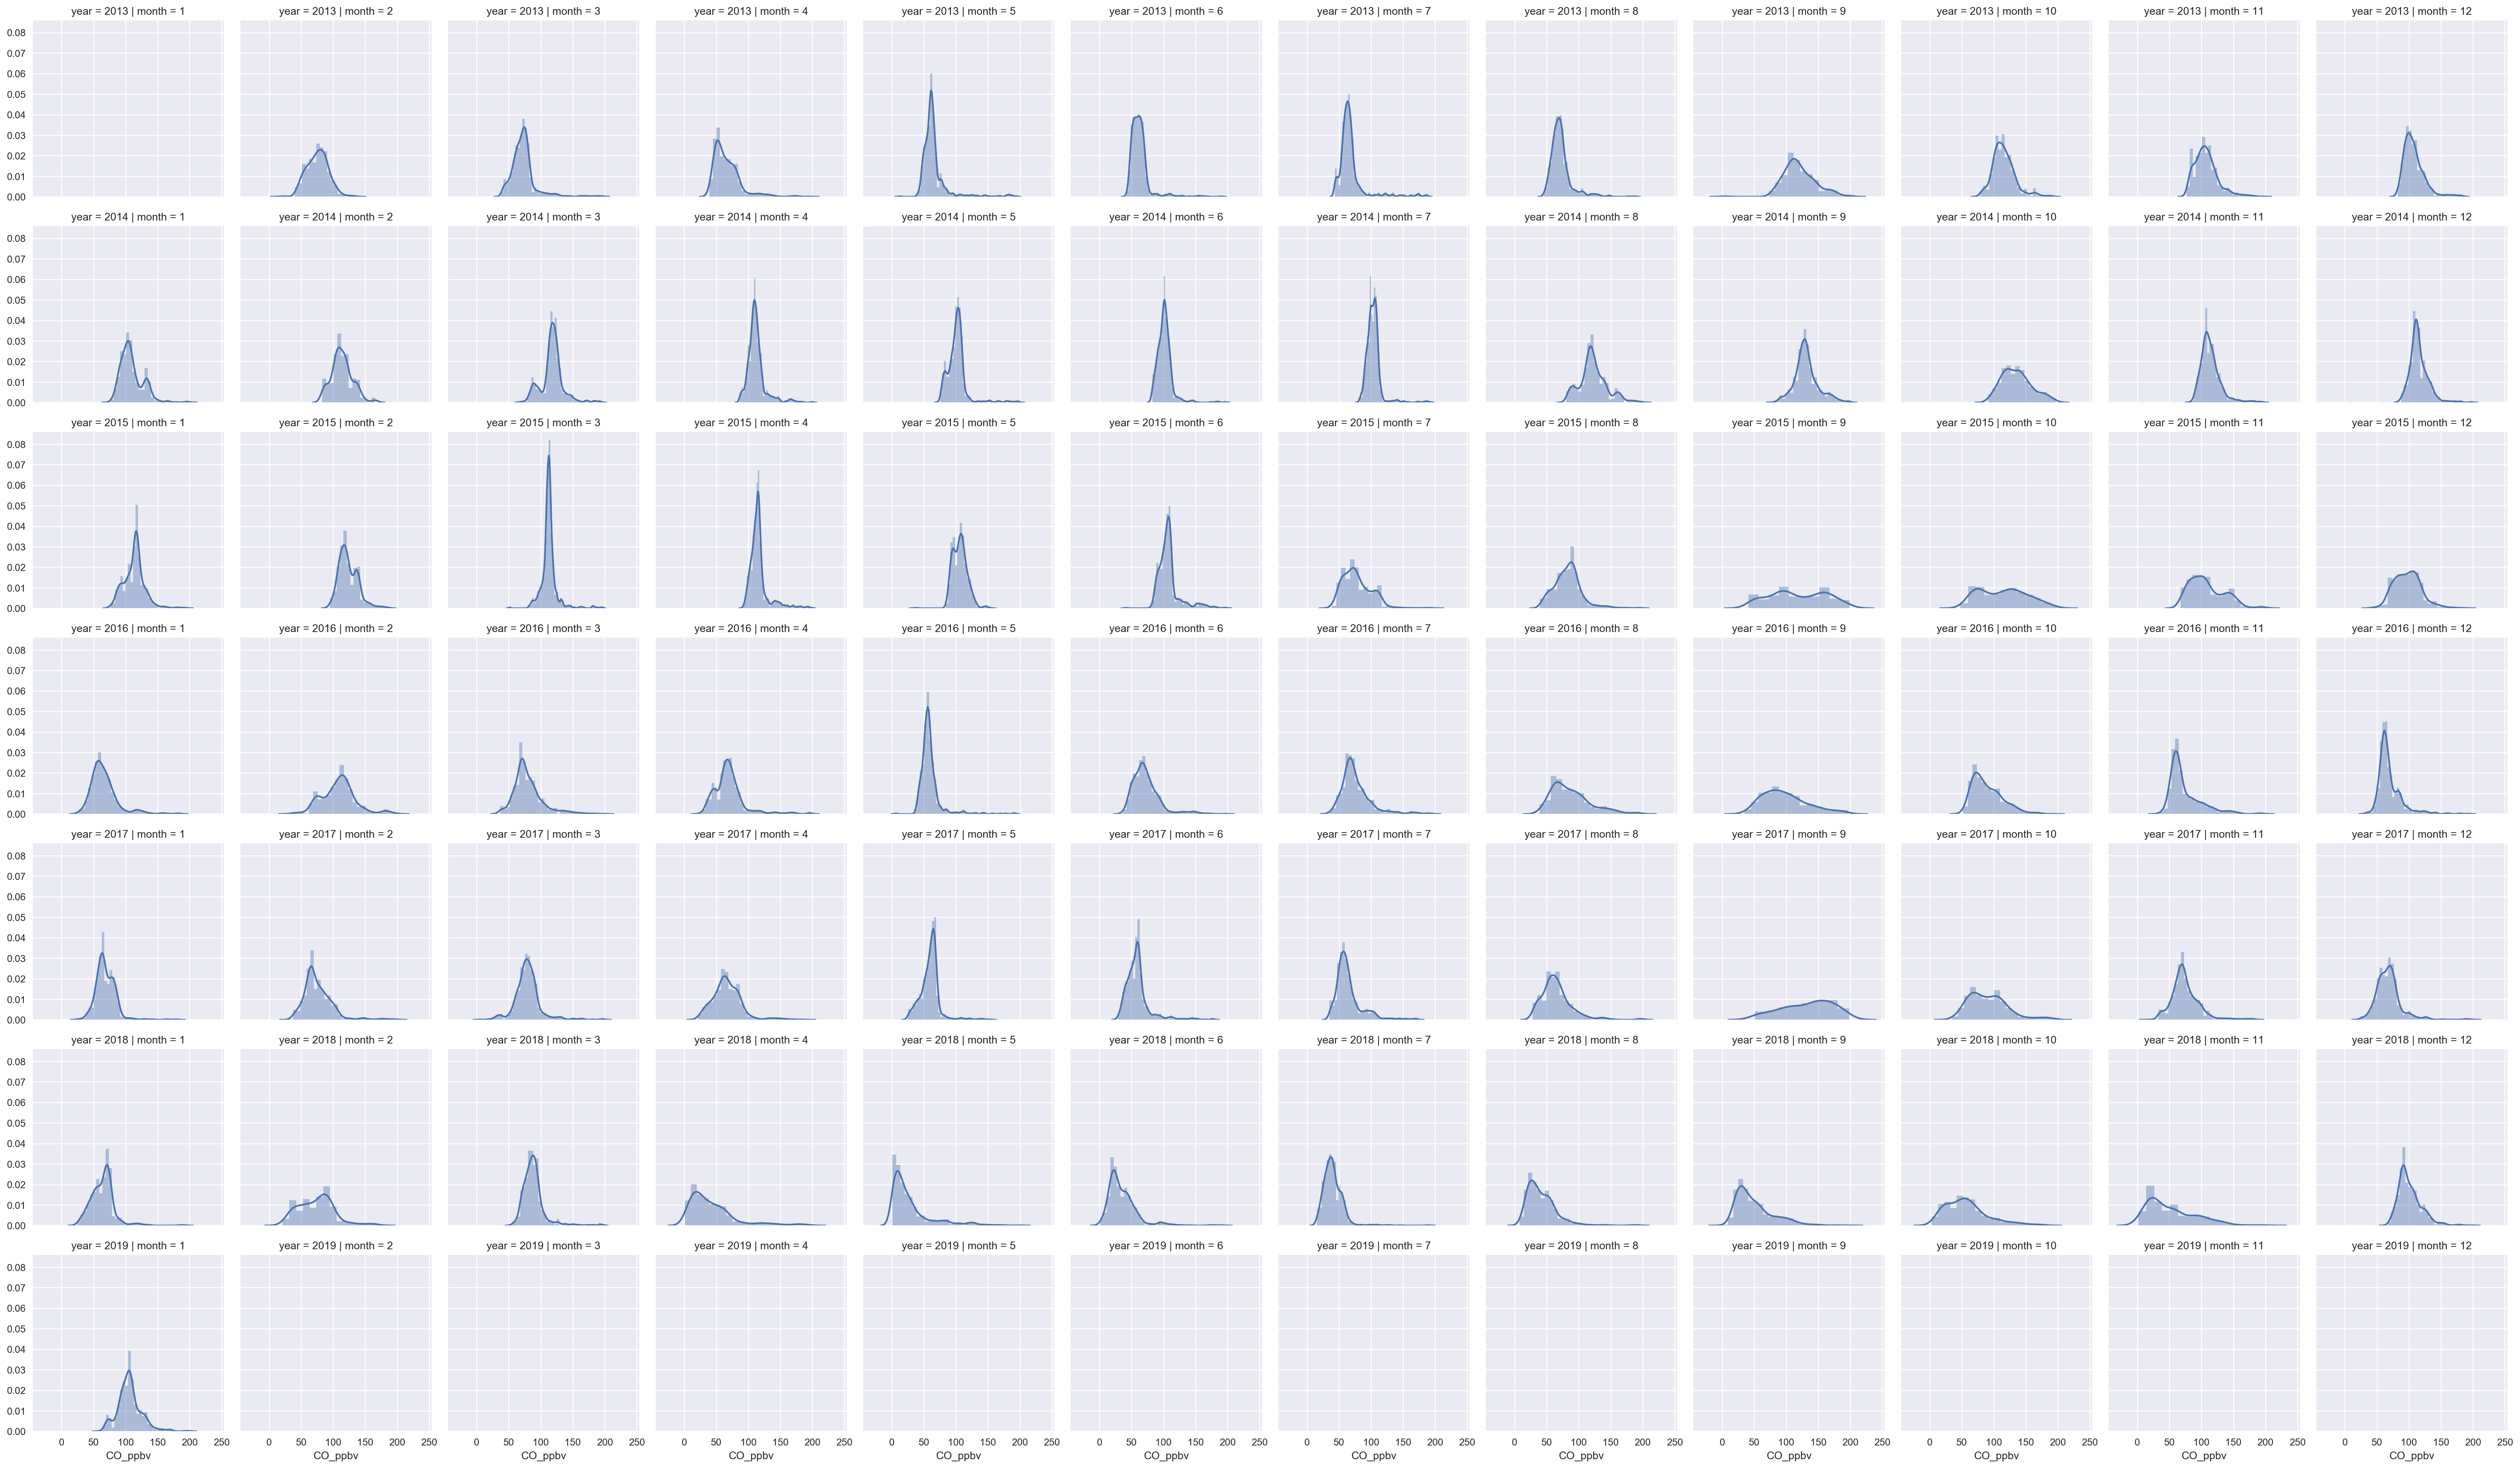

In [373]:
g = sns.FacetGrid(df_join1[(df_join1.CO_ppbv>0)&(df_join1.CO_ppbv<200)],col='month',row='year')
g.map(sns.distplot,'CO_ppbv')


In [379]:
for a in g.axes.flatten():
    sns.distplot(ddc,ax=a,color=ucp.cl[2])

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


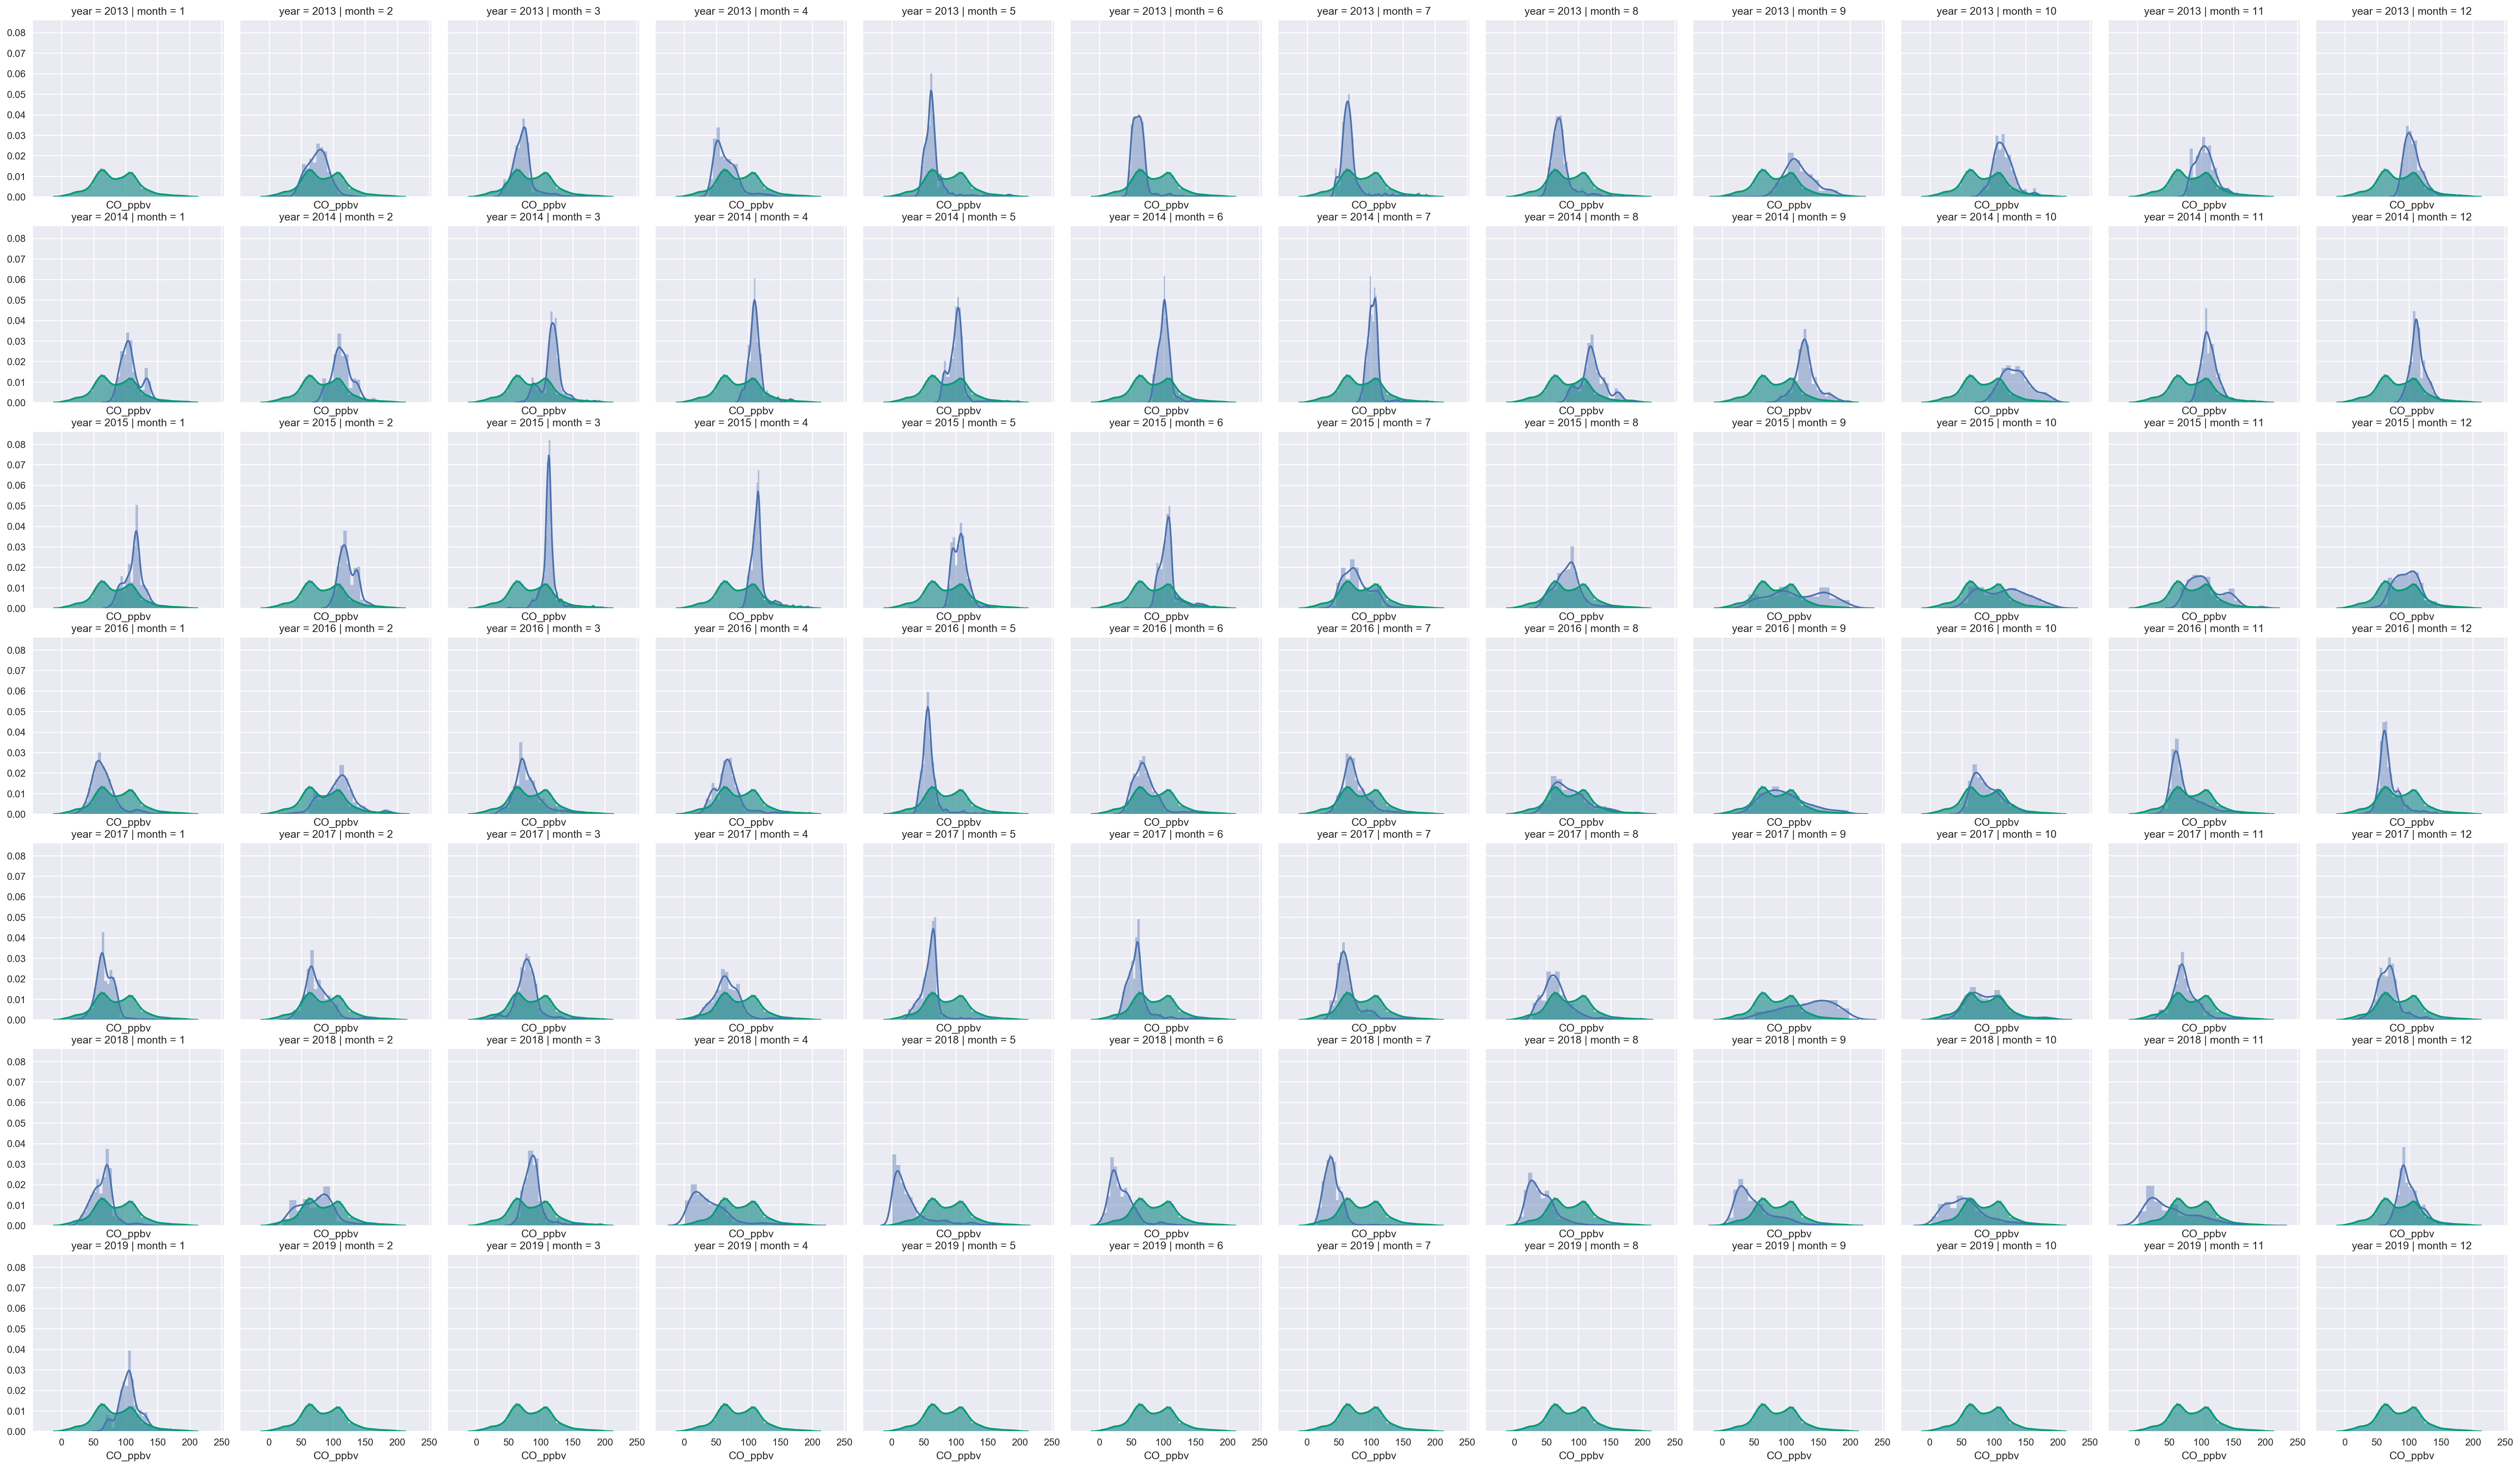

In [380]:
g.fig

In [457]:
cok = 'CO_ppbv'
cos = 'CO [ppbv] MOPIT' 
df_hor = df_join1.groupby('y_m')[cok].median()
coh = 'CO [ppbv] HORIB'
df_hor.name = coh
df_sat = xs_co.MOP03JM_007_RetrievedCOSurfaceMixingRatioDay.median(['lat','lon'])
df_sat.name = cos
df_sat = df_sat.to_dataframe()
df_sat = df_sat.resample('m').mean()
df_sat.index = df_sat.index + pd.Timedelta(1,'D')
df_sh = df_sat.join(df_hor,how='outer')
# df_sat[~np.isnan(df_sat)]
df_sh['y_m']=df_sh.index.strftime('%Y-%m')
df_sh['year']=df_sh.index.strftime('%Y-01')
# df_sh

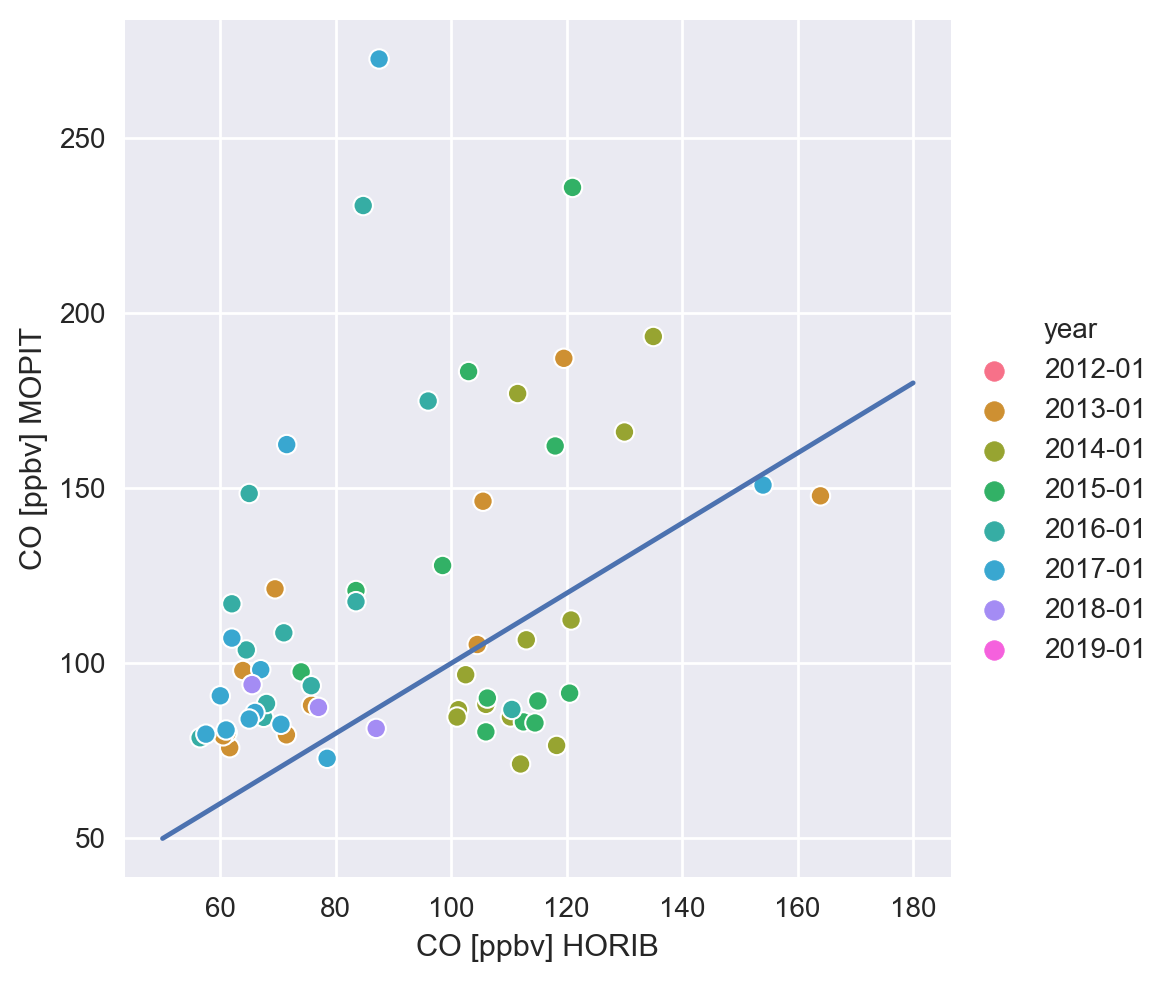

In [458]:
fg = sns.relplot(coh,cos,data=df_sh, 
            hue='year',
#             style='year',
#             hue_order = [2012,2013,2014,2015,2016,2018,2019]
           )

fg.ax.plot([50,180],[50,180])

In [459]:
df_sh['month']=df_sh.index.month

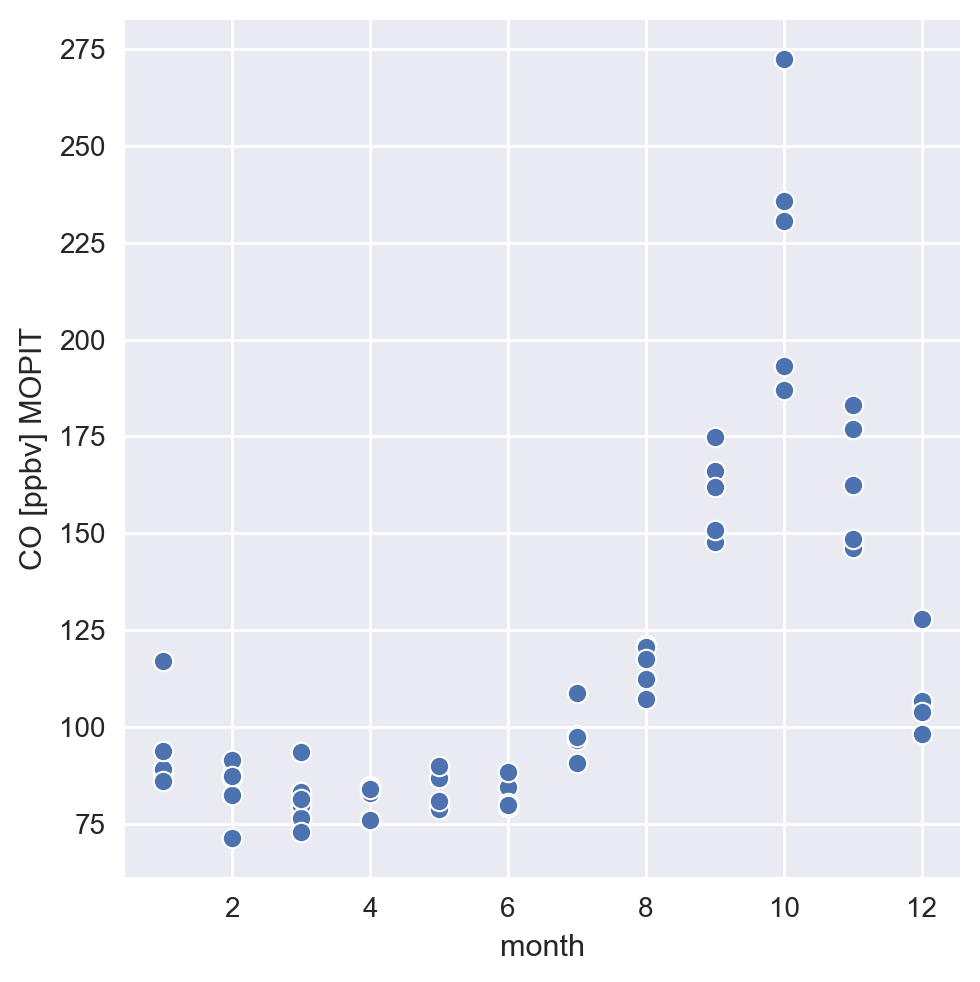

In [460]:
sns.relplot('month',cos,data=df_sh)

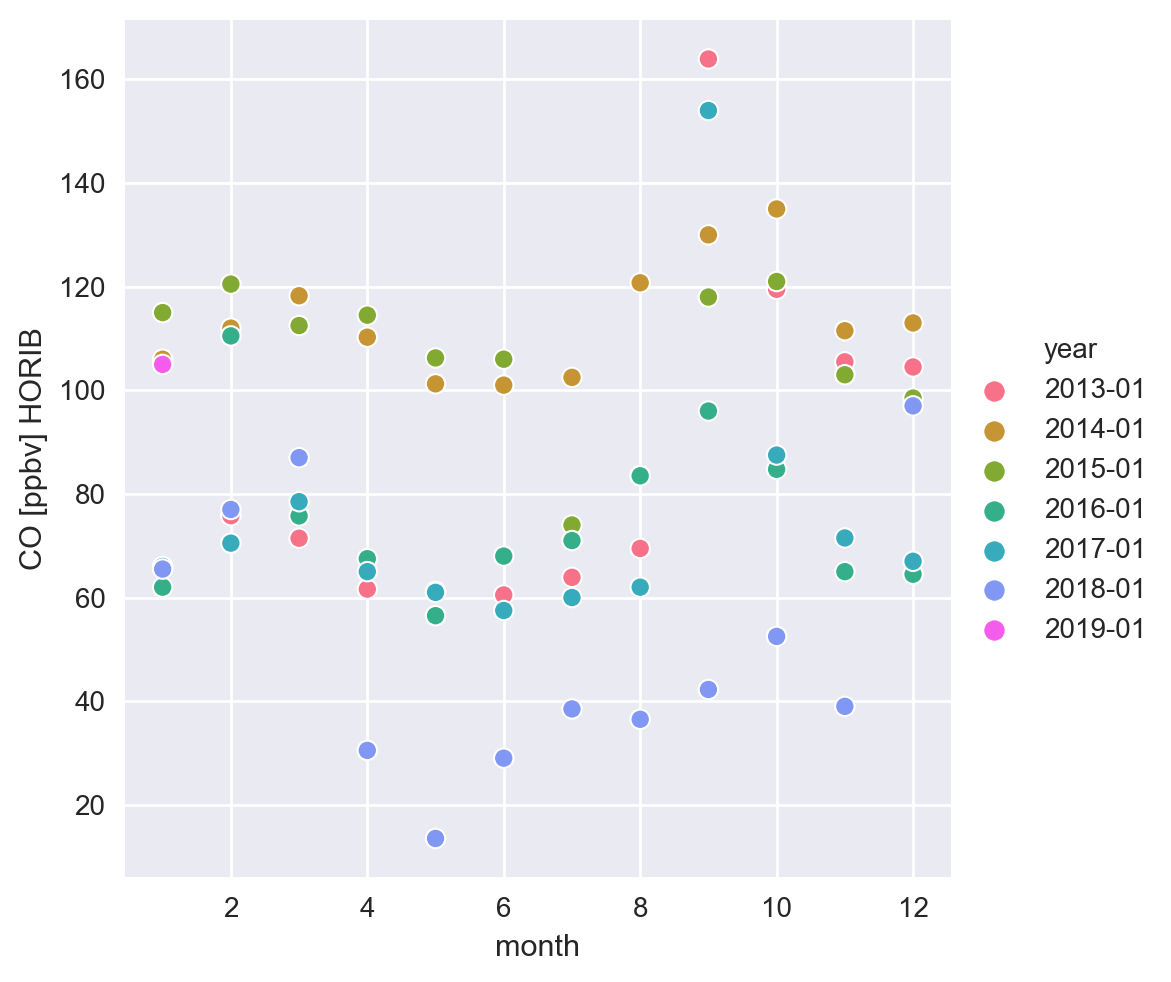

In [470]:
sns.relplot('month',coh,data=df_sh[~df_sh[coh].isna()],hue='year',kind='scatter',markers=True)

In [544]:
df_join1.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [562]:
def p_dist(month,year,ax,df_join1):
    b1 = df_join1.month == month
    b2 = df_join1.year  == year
    cok = 'CO_ppbv'
    d1 = df_join1[b1 & b2][cok]
    d1=d1.dropna()
    d1 = d1[d1<=200]
    d1 = d1[d1>=0  ]
    sns.distplot(d1,ax=ax,label=year)
    ax.legend()
    ax.set_xlim(0,200)
    ax.set_xlabel('')
    return ax


fig, axs = plt.subplots(12,1,sharex=True,figsize=(4,25))

years = 2013,2014,2015,2016,2017,2018

i = 0 
axl = axs.flatten()
for m in range(1,13):
    for y in range(len(years)):
        ax=p_dist(m,years[y],axl[m-1],df_join1)    
    ax.set_title(m)
    
        
plt.close(fig)


/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


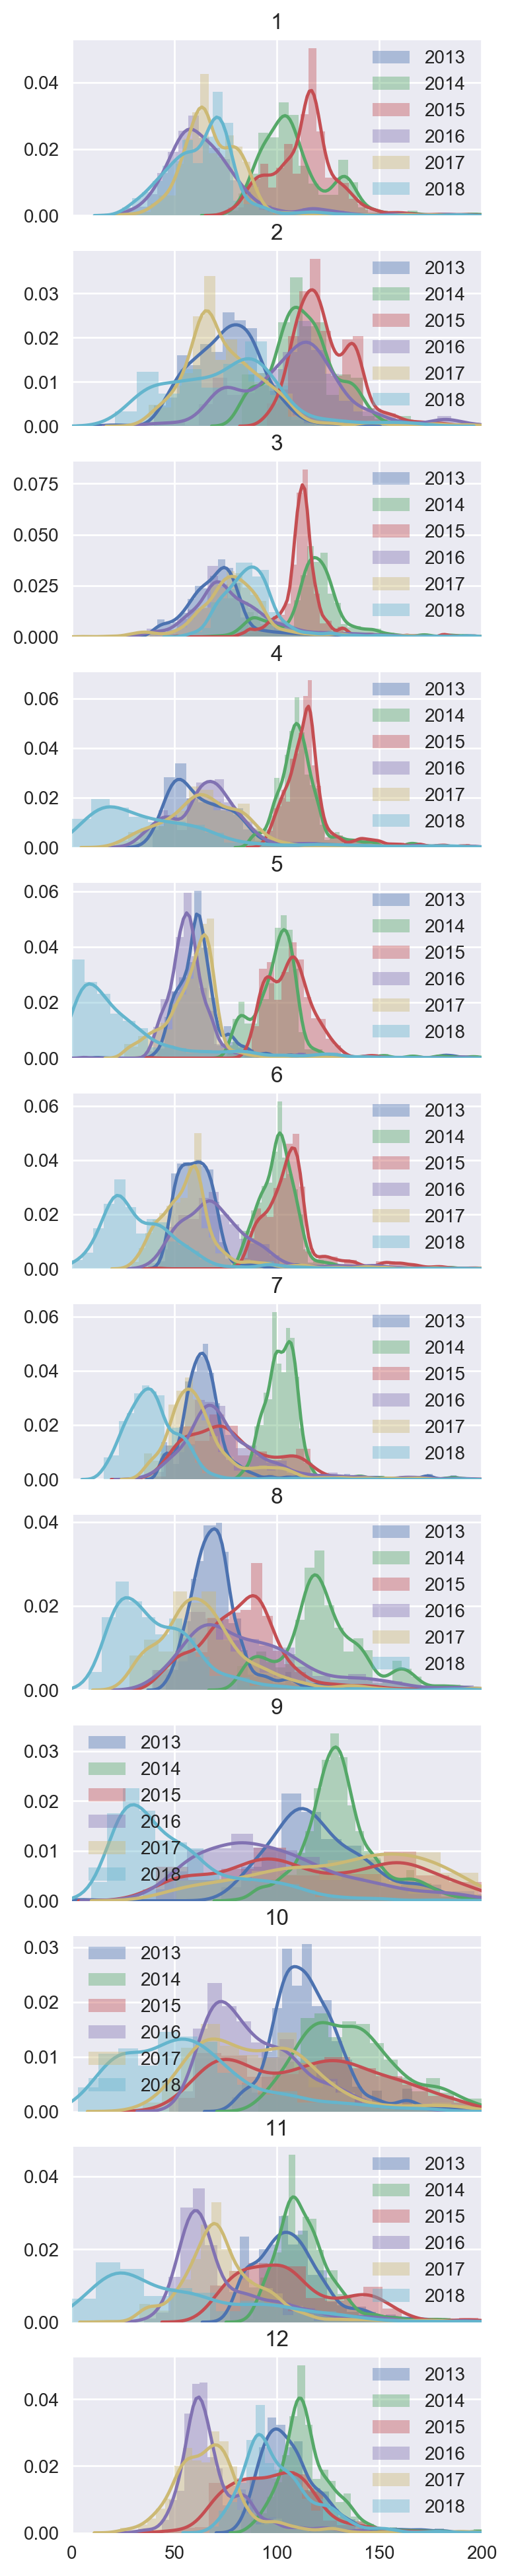

In [563]:
fig

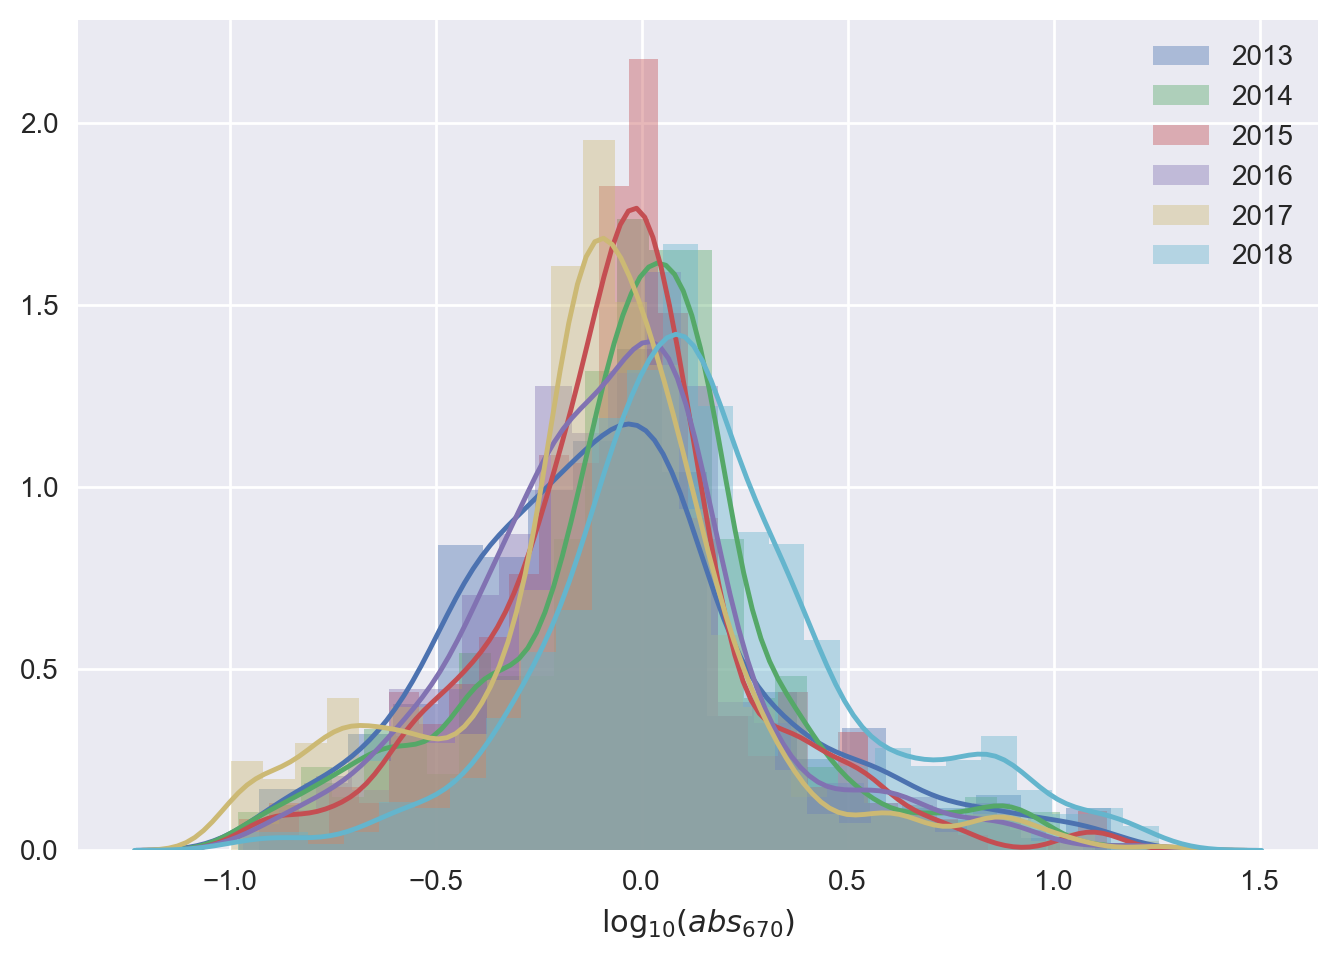

In [592]:
fig, ax = plt.subplots()
years = 2013,2014,2015,2016,2017,2018
  
for y in years:
    b1 = df_join1.month == 5 
    b2 = df_join1.year  == y
    cok = 'abs670'
    d1 = df_join1[b1 & b2][cok]
    d1=d1.dropna()
    d1 = d1[d1<=20  ]
    d1 = d1[d1>=.1  ]
    d1 = np.log10(d1)
    d1.name = '${\log}_{10}({abs}_{670})$'
    sns.distplot(d1,ax=ax,label=y)
    ax.legend()

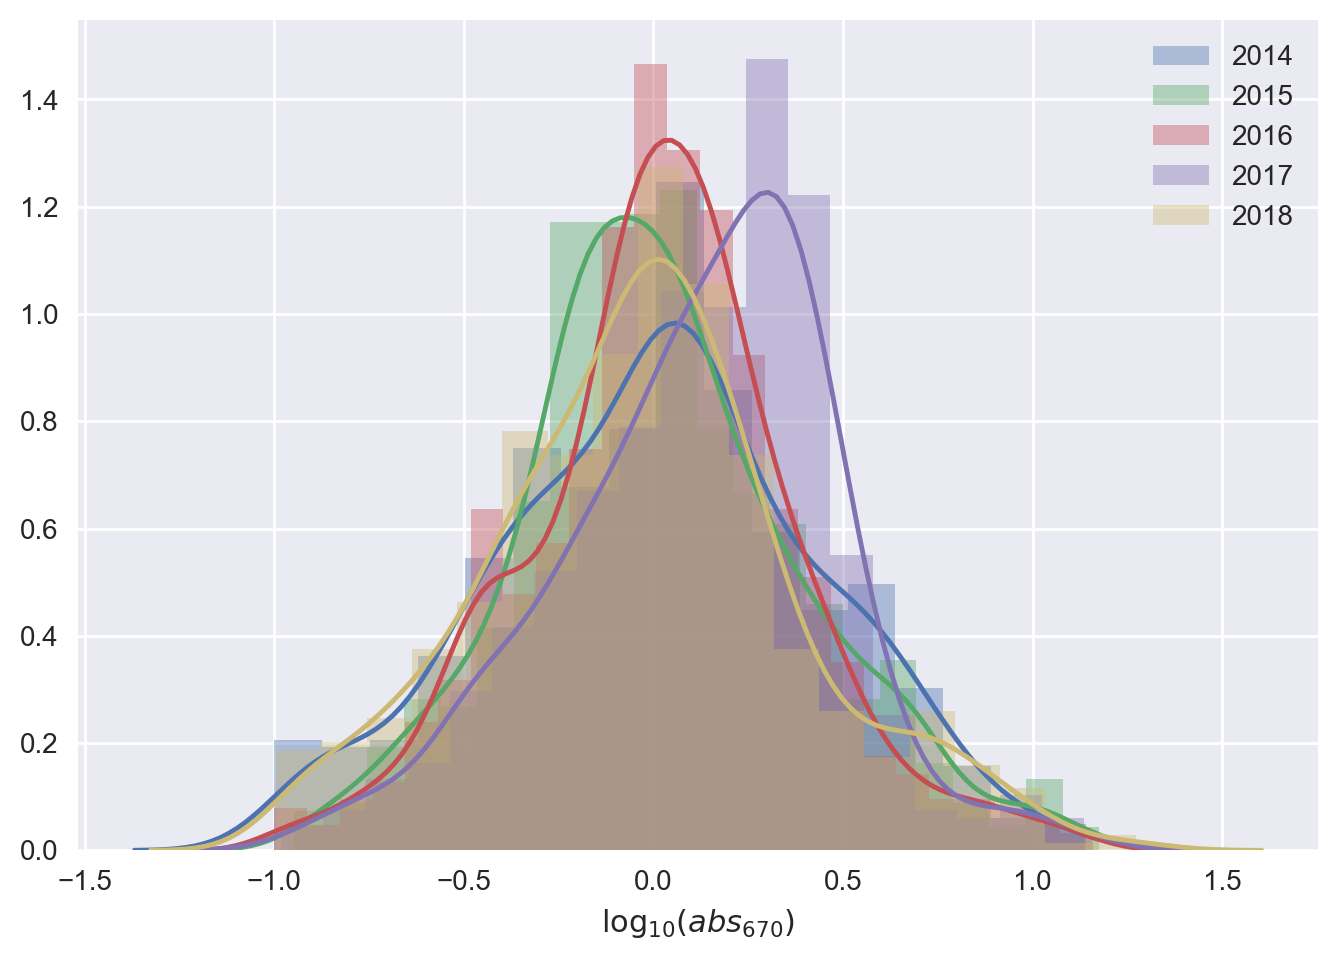

In [508]:
fig, ax = plt.subplots()
years = 2014,2015,2016,2017,2018
  
for y in years:
    b1 = df_join1.month == 10 
    b2 = df_join1.year  == y
    cok = 'abs670'
    d1 = df_join1[b1 & b2][cok]
    d1=d1.dropna()
    d1 = d1[d1<=20  ]
    d1 = d1[d1>=.1  ]
    d1 = np.log10(d1)
    d1.name = '${\log}_{10}({abs}_{670})$'
    sns.distplot(d1,ax=ax,label=y)
    ax.legend()

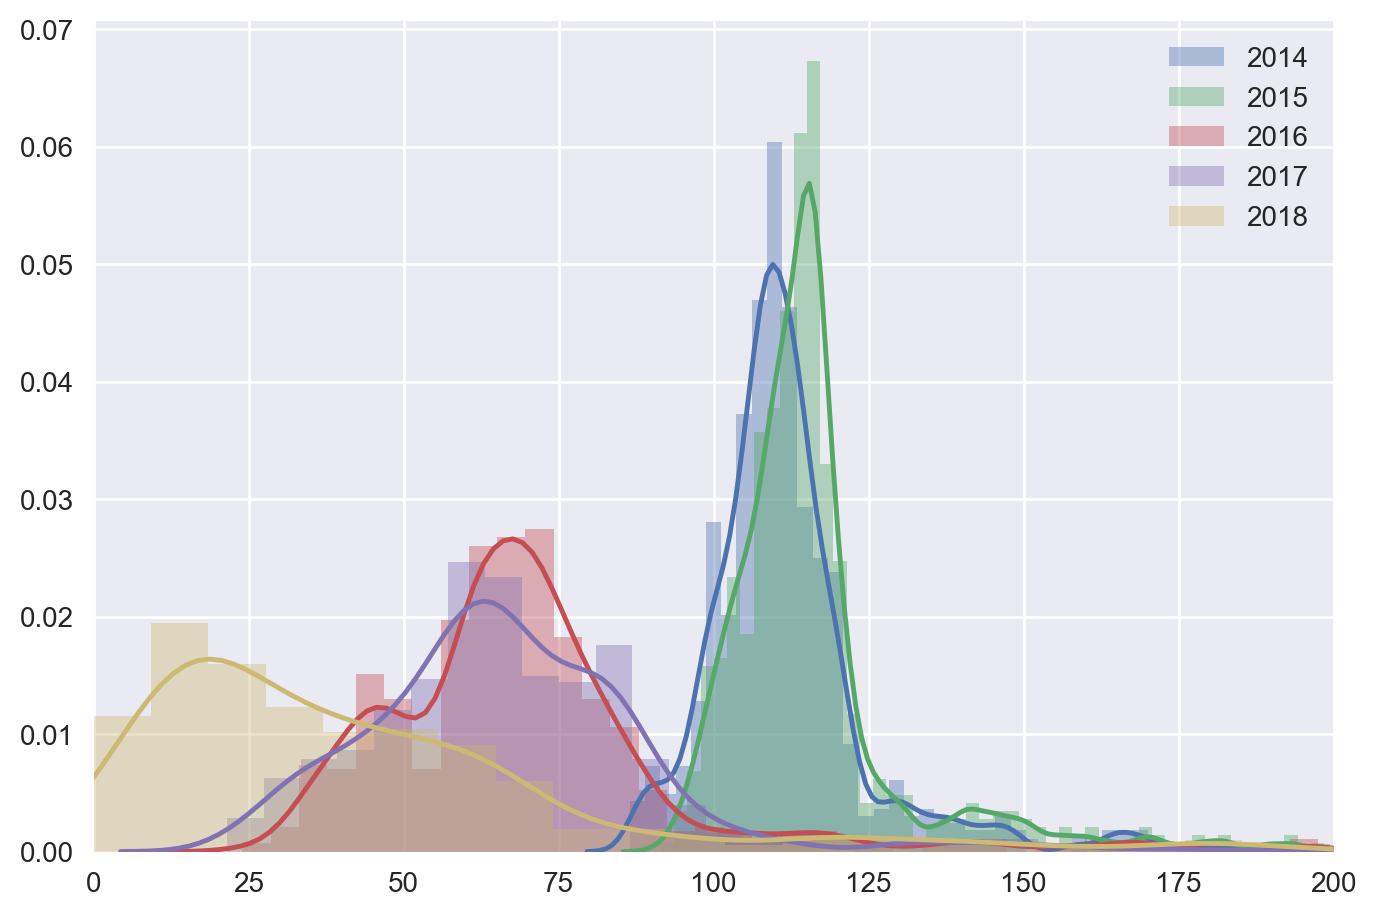

In [570]:
fig, ax = plt.subplots()
for y in years:
    ax = p_dist(4,y,ax,df_join1)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


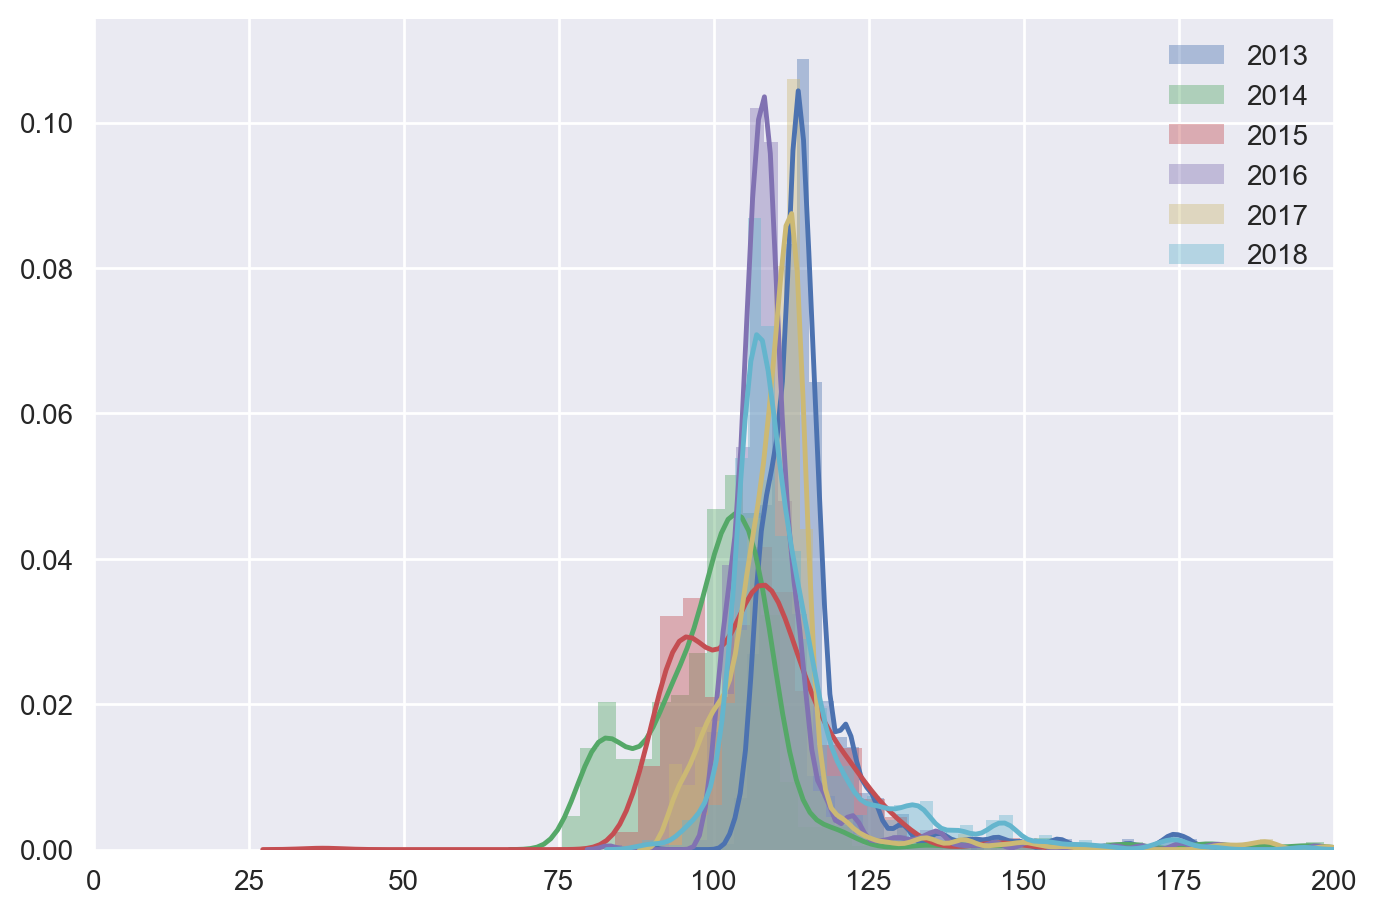

In [757]:
years = 2013,2014,2015,2016,2017,2018
d2 = df_join1.copy()
cok = 'CO_ppbv'
d2.loc[d2.year==2017,cok] = d2.loc[d2.year==2017,cok]/2+80
d2.loc[d2.year==2016,cok] = d2.loc[d2.year==2016,cok]/2+80
d2.loc[d2.year==2018,cok] = d2.loc[d2.year==2018,cok]/3+105
d2.loc[d2.year==2013,cok] = d2.loc[d2.year==2013,cok]/2+83

fig, ax = plt.subplots()
for y in years:
    ax = p_dist(5,y,ax,d2)

In [597]:
def p_dist(month,year,ax,df_join1):
    b1 = df_join1.month == month
    b2 = df_join1.year  == year
    cok = 'CO_ppbv'
    d1 = df_join1[b1 & b2][cok]
    d1=d1.dropna()
    d1 = d1[d1<=200]
    d1 = d1[d1>=0  ]
    sns.distplot(d1,ax=ax,label=year)
    ax.legend()
    ax.set_xlim(0,200)
    ax.set_xlabel('')
    return ax


fig, axs = plt.subplots(12,1,sharex=True,figsize=(4,25))

years = 2013,2014,2015,2016,2017,2018

i = 0 
axl = axs.flatten()
for m in range(1,13):
    for y in range(len(years)):
        ax=p_dist(m,years[y],axl[m-1],d2)    
    ax.set_title(m)
    
        
plt.close(fig)

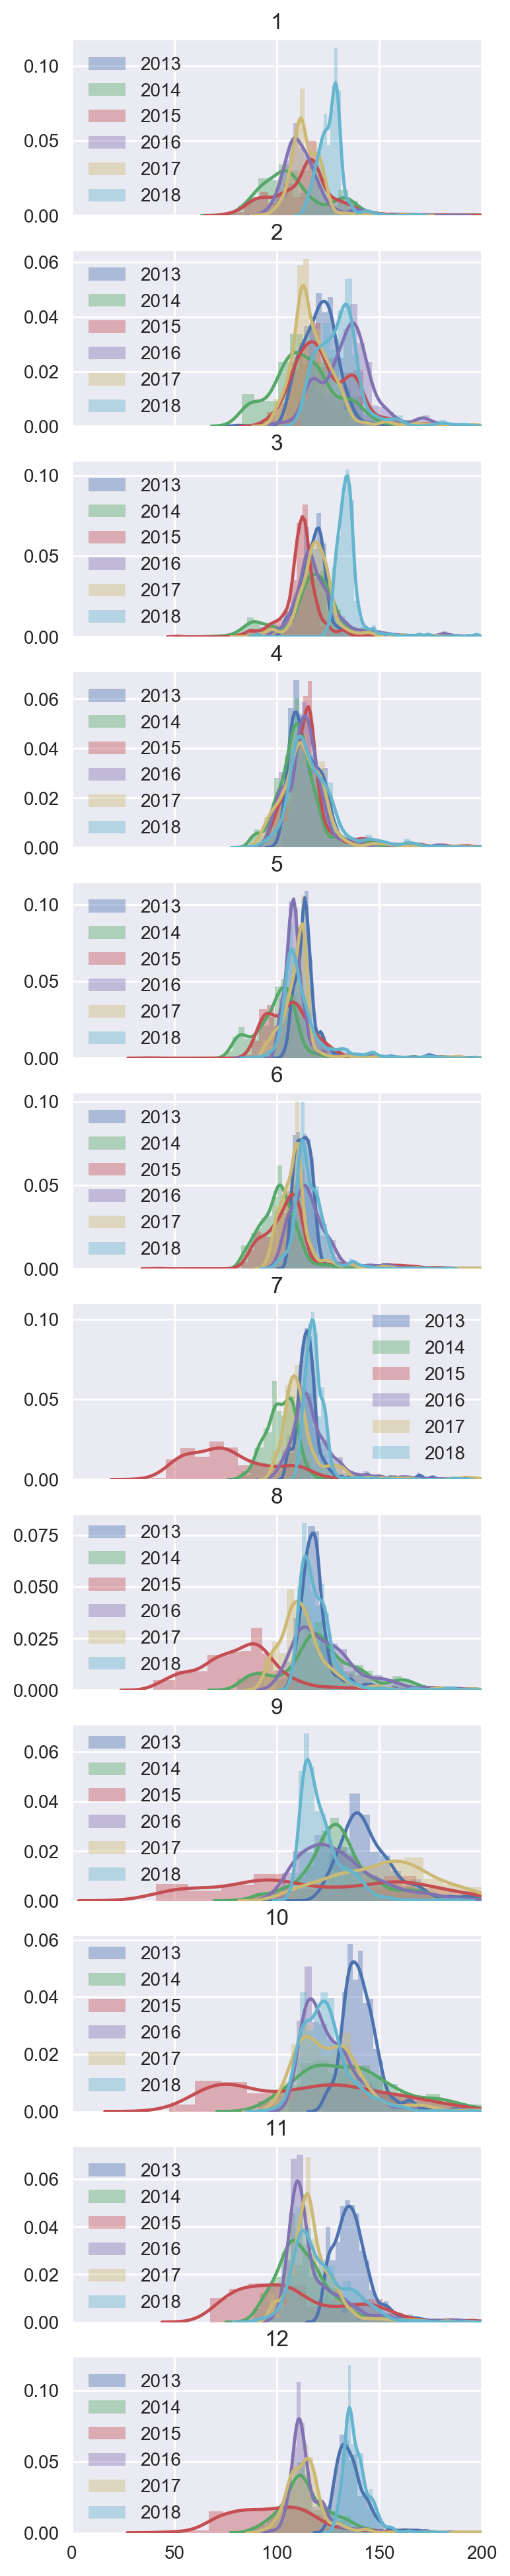

In [598]:
fig

In [753]:
d2 = df_join1.copy()
ra = np.arange(-50,500,.5)
va7 = d2.loc[(d2.month==5) &(d2.year==2018),cok].dropna()
va5 = d2.loc[(d2.month==5) &(d2.year==2015),cok].dropna()

In [760]:
hi5=np.histogram(va5,ra)[0]
hi5 = hi5/hi5.sum()

def optimize_me(x):
    hi7=np.histogram(va7/(x[0])+x[1],ra)[0]
    hi7 = hi7/hi7.sum()
    return ((hi7-hi5)**2).sum()

In [761]:
from scipy.optimize import brute

In [762]:
brute(optimize_me,(slice(1.5,4,.01),slice(60,120,1)))

array([ 1.50106373, 95.01282883])